<a href="https://colab.research.google.com/github/rushil2501/B20AI036-Data-Visualization-Lab-4/blob/main/B20AI036_Data_Visualization_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Ayush Colleges

In [ ]:
df1 = pd.read_csv('/content/MergerdAyush_Colleges_in_India_01-04-2021_0 (1).csv')
df1.head()

State or Union Territory Type of System  No. of Colleges - Govt  \
0          Andhra Pradesh        Ayurveda                       1   
1                  Assam         Ayurveda                       1   
2                   Bihar        Ayurveda                       2   
3           Chhattisgarh         Ayurveda                       2   
4                  Delhi         Ayurveda                       3   

   Admission Capacity - Govt  Permitted Seats - Govt  \
0                        100                     100   
1                         93                      93   
2                        211                     211   
3                        216                     216   
4                        359                     359   

   No. of Colleges - Non-Govt  Admission Capacity - Non-Govt  \
0                           2                            176   
1                           0                              0   
2                           6                            280   
3                           4                            280   
4                           0                              0   

   Permitted Seats - Non-Govt  
0                         118  
1                           0  
2                         153  
3                         250  
4                           0

In [ ]:
df1.columns

Index(['State or Union Territory', 'Type of System', 'No. of Colleges - Govt',
       'Admission Capacity - Govt', 'Permitted Seats - Govt',
       'No. of Colleges - Non-Govt', 'Admission Capacity - Non-Govt',
       'Permitted Seats - Non-Govt'],
      dtype='object')

In [ ]:
print(df1['Type of System'].unique())

['Ayurveda' 'Unani' 'Siddha' 'Naturopathy' 'Homoeopathy']


## Visualizing No. of Colleges - Govt

using simple barplot

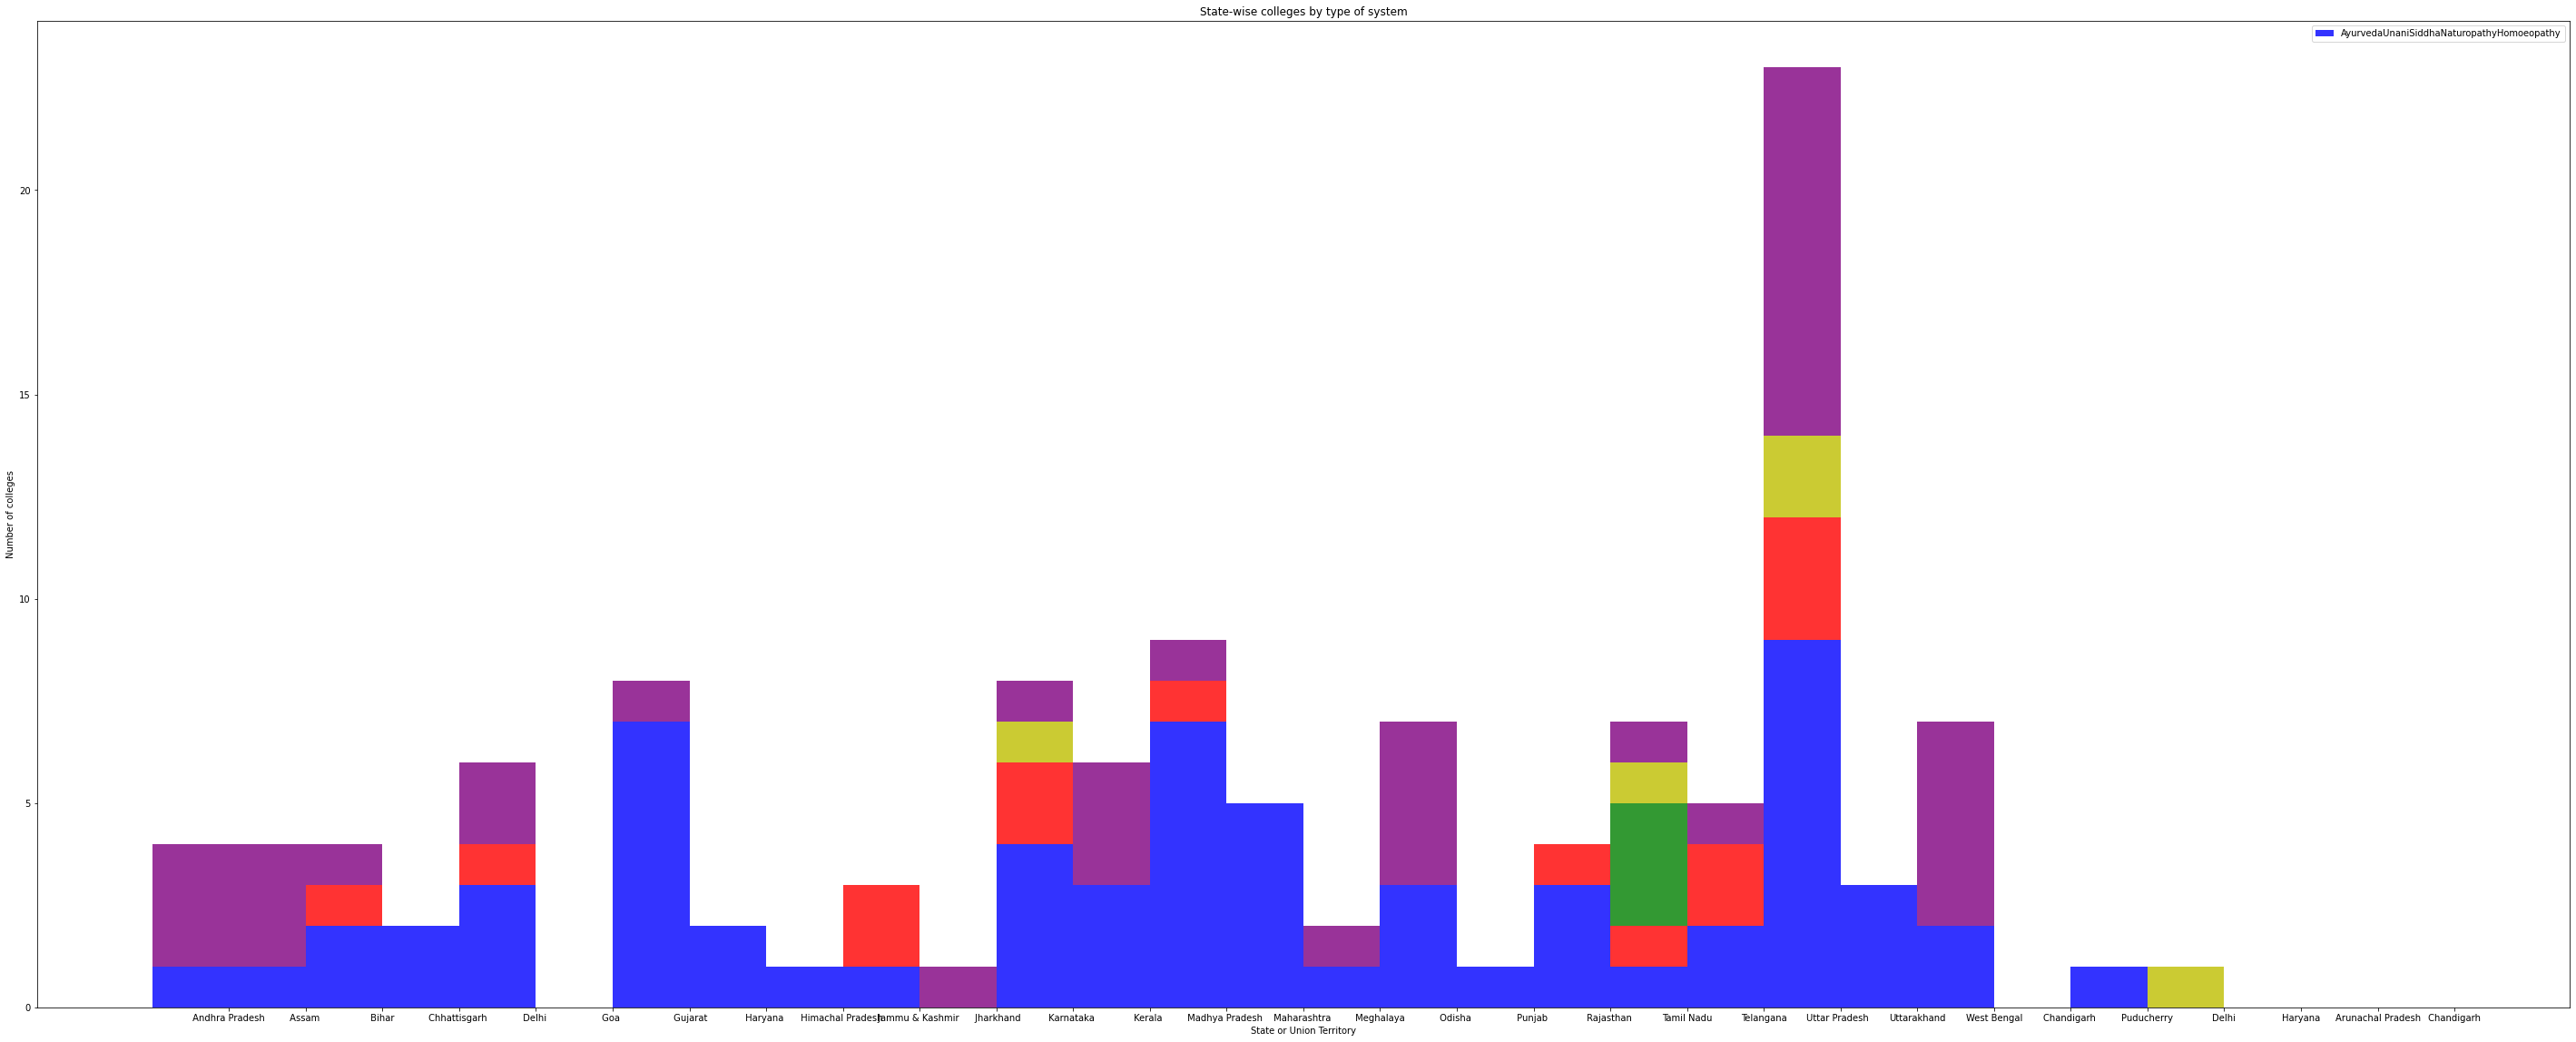

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = df1
plt.figure(figsize=(50, 20))
# Set the figure size
# plt.figure(figsize=(12, 8))

# Group the data by state and type of system
grouped_data = df.groupby(['State or Union Territory', 'Type of System']).sum()

# Create a stacked bar chart
bar_width = 0.35
opacity = 0.8
index = pd.IndexSlice
states = df['State or Union Territory'].unique()

for i, state in enumerate(states):
    try:
        ayurveda_data = grouped_data.loc[index[state, 'Ayurveda'], :]
    except KeyError:
        ayurveda_data = pd.Series([0, 0, 0, 0,0,0], index=grouped_data.columns)
    try:
        unani_data = grouped_data.loc[index[state, 'Unani'], :]
    except KeyError:
        unani_data = pd.Series([0, 0, 0, 0,0,0], index=grouped_data.columns)
    try:
        siddha_data = grouped_data.loc[index[state, 'Siddha'], :]
    except KeyError:
        siddha_data = pd.Series([0, 0, 0, 0,0,0], index=grouped_data.columns)
    try:
        naturopathy_data = grouped_data.loc[index[state, 'Naturopathy'], :]
    except KeyError:
        naturopathy_data = pd.Series([0, 0, 0, 0,0,0], index=grouped_data.columns)
    try:
        homoeopathy_data = grouped_data.loc[index[state, 'Homoeopathy'], :]
    except KeyError:
        homoeopathy_data = pd.Series([0, 0, 0, 0,0,0], index=grouped_data.columns)
    x = i * bar_width
    # plt.bar()
    plt.bar(x, ayurveda_data['No. of Colleges - Govt'], bar_width, alpha=opacity, color='b', label='Ayurveda')
    plt.bar(x, unani_data['No. of Colleges - Govt'], bar_width, bottom=ayurveda_data['No. of Colleges - Govt'], alpha=opacity, color='r', label='Unani')
    plt.bar(x, siddha_data['No. of Colleges - Govt'], bar_width, bottom=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'], alpha=opacity, color='g', label='Siddha')
    plt.bar(x, naturopathy_data['No. of Colleges - Govt'], bar_width, bottom=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'] + siddha_data['No. of Colleges - Govt'], alpha=opacity, color='y', label='Naturopathy')
    plt.bar(x, homoeopathy_data['No. of Colleges - Govt'], bar_width, bottom=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'] + siddha_data['No. of Colleges - Govt'] + naturopathy_data['No. of Colleges - Govt'], alpha=opacity, color='purple', label='Homoeopathy')

# Set the chart title and labels
plt.title('State-wise colleges by type of system')
plt.xticks([bar_width / 2 + i * bar_width for i in range(len(states))], states)
plt.xlabel('State or Union Territory')
plt.ylabel('Number of colleges')
plt.legend(labels=['Ayurveda' 'Unani' 'Siddha' 'Naturopathy' 'Homoeopathy'])

# Show the plot
plt.show()


As we can see the vertical barplot does not visualize properly hence I use the horizontal one

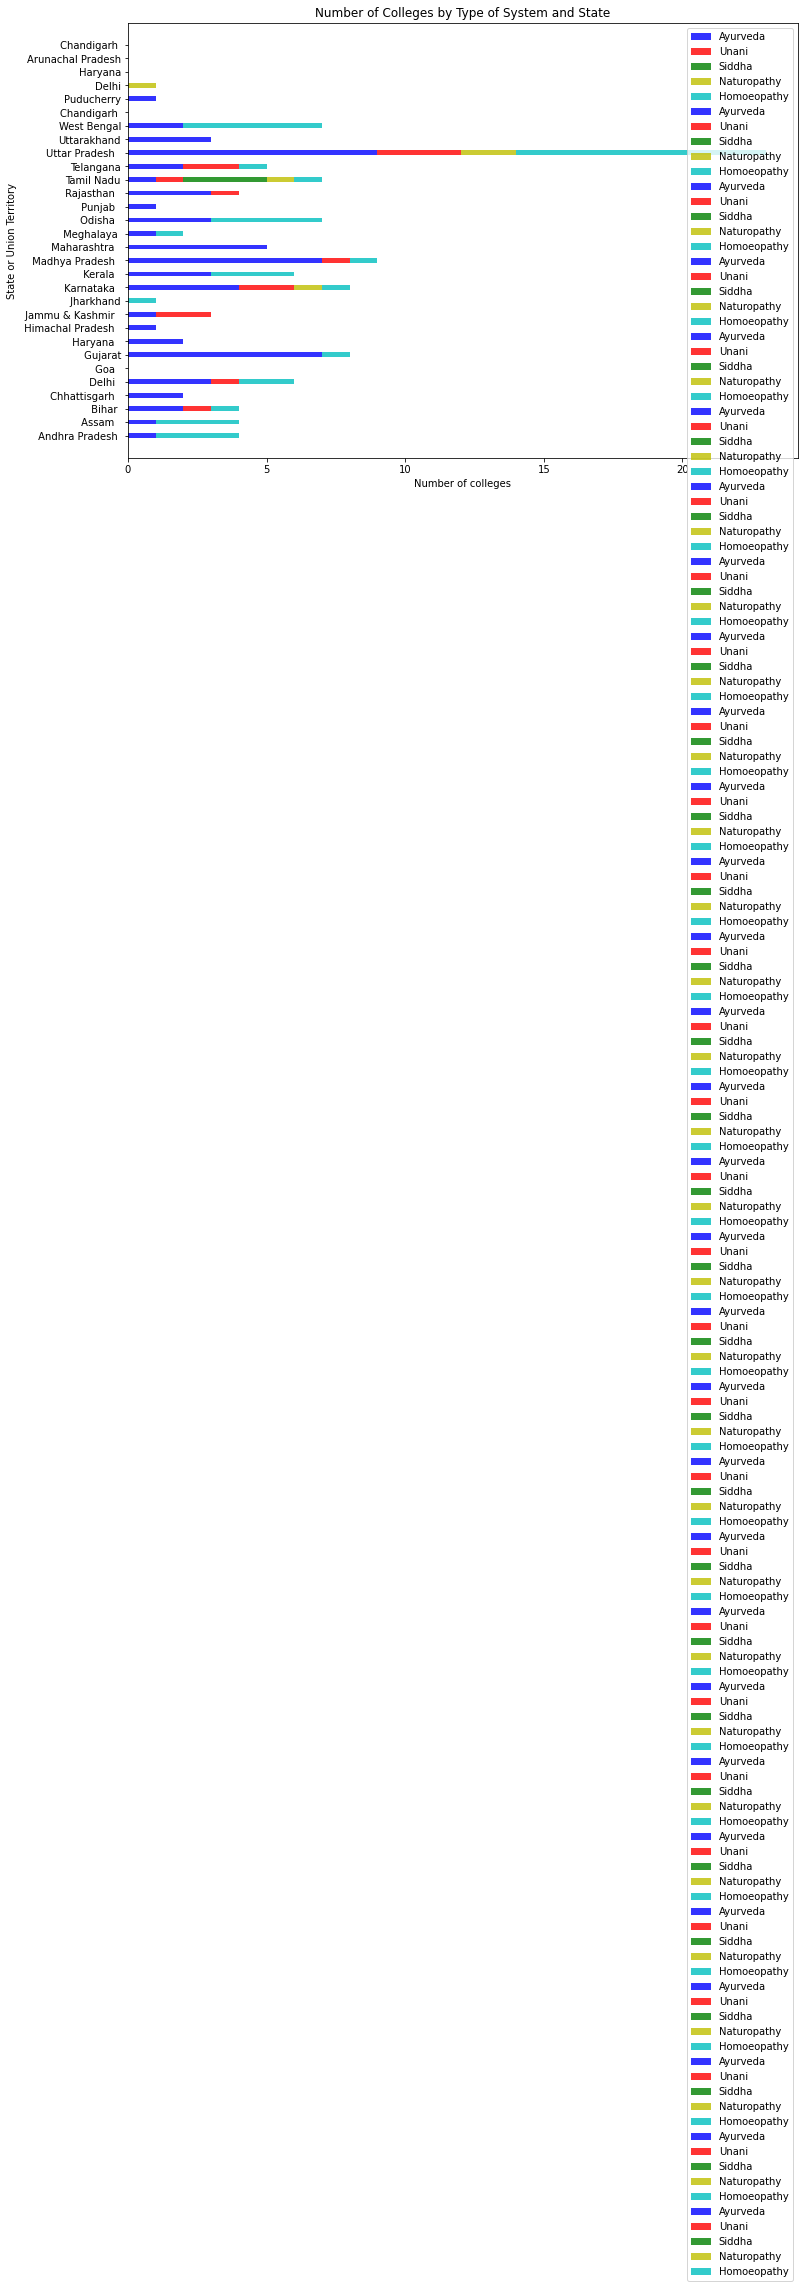

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/MergerdAyush_Colleges_in_India_01-04-2021_0 (1).csv')

# Group the data by state and type of system
plt.figure(figsize=(12, 8))

# Group the data by state and type of system
grouped_data = df.groupby(['State or Union Territory', 'Type of System']).sum()

# Create a stacked bar chart
bar_width = 0.35
opacity = 0.8
index = pd.IndexSlice
states = df['State or Union Territory'].unique()

for i, state in enumerate(states):
    x = i * bar_width
    
    # Get the data for each type of system in the state
    try:
        ayurveda_data = grouped_data.loc[index[state, 'Ayurveda'], :]
    except KeyError:
        ayurveda_data = pd.Series([0, 0, 0, 0, 0, 0], index=grouped_data.columns)
    try:
        unani_data = grouped_data.loc[index[state, 'Unani'], :]
    except KeyError:
        unani_data = pd.Series([0, 0, 0, 0, 0, 0], index=grouped_data.columns)
    try:
        siddha_data = pd.Series(0, index=grouped_data.columns)
        siddha_data.update(grouped_data.loc[index[state, 'Siddha'], :])
    except KeyError:
        pass
    try:
        naturopathy_data = grouped_data.loc[index[state, 'Naturopathy'], :]
    except KeyError:
        naturopathy_data = pd.Series([0, 0, 0, 0, 0, 0], index=grouped_data.columns)
    try:
        homoeopathy_data = grouped_data.loc[index[state, 'Homoeopathy'], :]
    except KeyError:
        homoeopathy_data = pd.Series([0, 0, 0, 0, 0, 0], index=grouped_data.columns)

    # Create the stacked bars
    plt.barh(state, ayurveda_data['No. of Colleges - Govt'], bar_width, alpha=opacity, color='b', label='Ayurveda')
    plt.barh(state, unani_data['No. of Colleges - Govt'], bar_width, left=ayurveda_data['No. of Colleges - Govt'], alpha=opacity, color='r', label='Unani')
    plt.barh(state, siddha_data['No. of Colleges - Govt'], bar_width, left=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'], alpha=opacity, color='g', label='Siddha')
    plt.barh(state, naturopathy_data['No. of Colleges - Govt'], bar_width, left=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'] + siddha_data['No. of Colleges - Govt'], alpha=opacity, color='y', label='Naturopathy')
    plt.barh(state, homoeopathy_data['No. of Colleges - Govt'], bar_width, left=ayurveda_data['No. of Colleges - Govt'] + unani_data['No. of Colleges - Govt'] + siddha_data['No. of Colleges - Govt'] + naturopathy_data['No. of Colleges - Govt'], alpha=opacity, color='c', label='Homoeopathy')
plt.xlabel('Number of colleges')
plt.ylabel('State or Union Territory')
plt.title('Number of Colleges by Type of System and State')
plt.legend()

plt.show()


Using seaborn

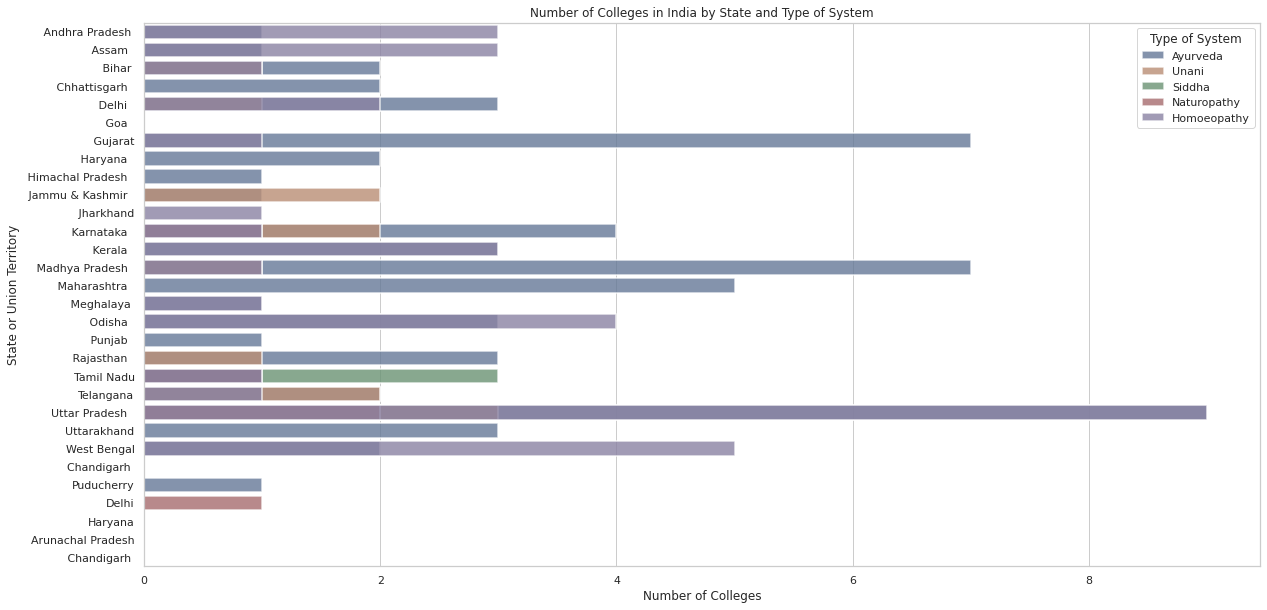

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


Screen Display

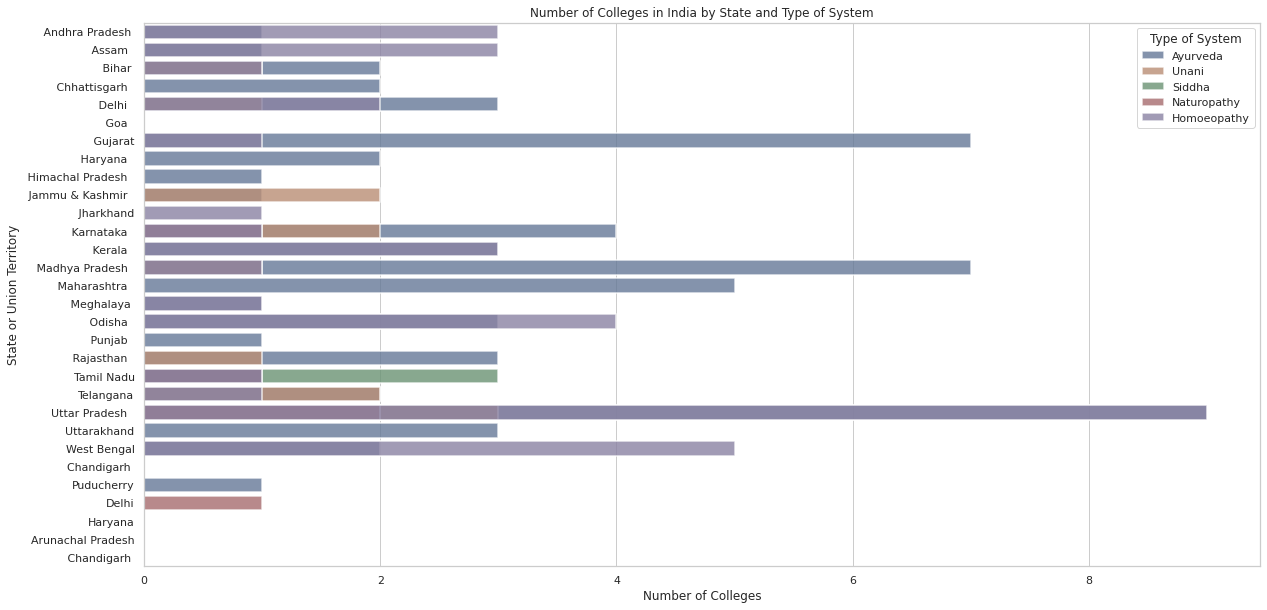

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

sns.set_context('notebook')
# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


Presentation

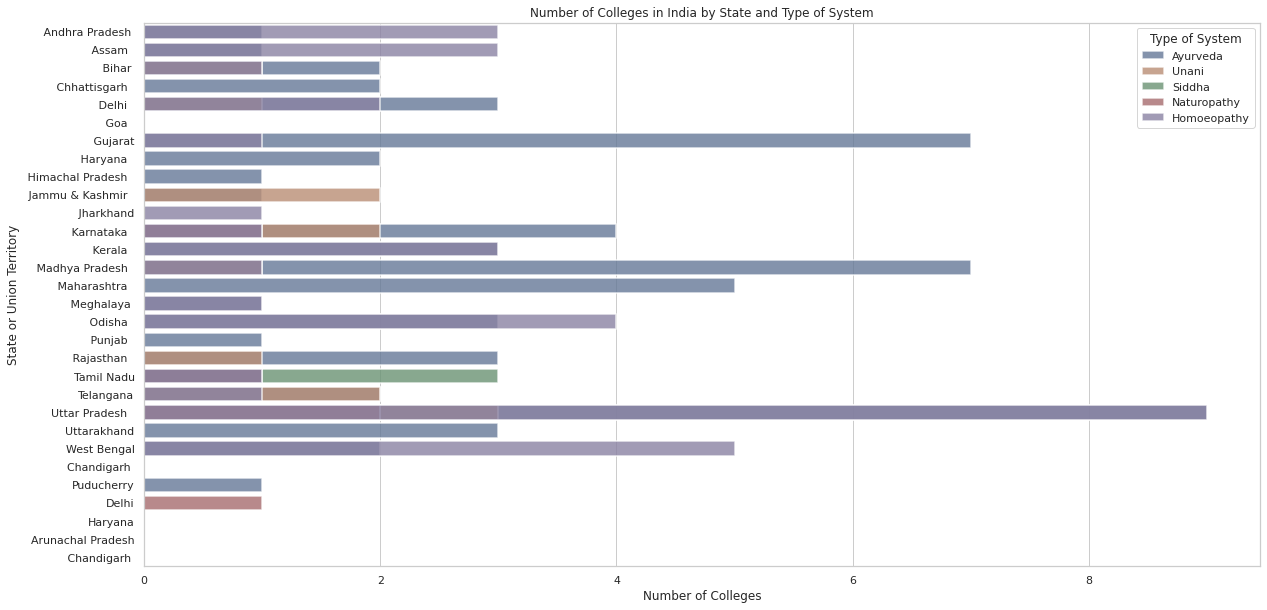

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

sns.set_context('talk')
# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


Poster print

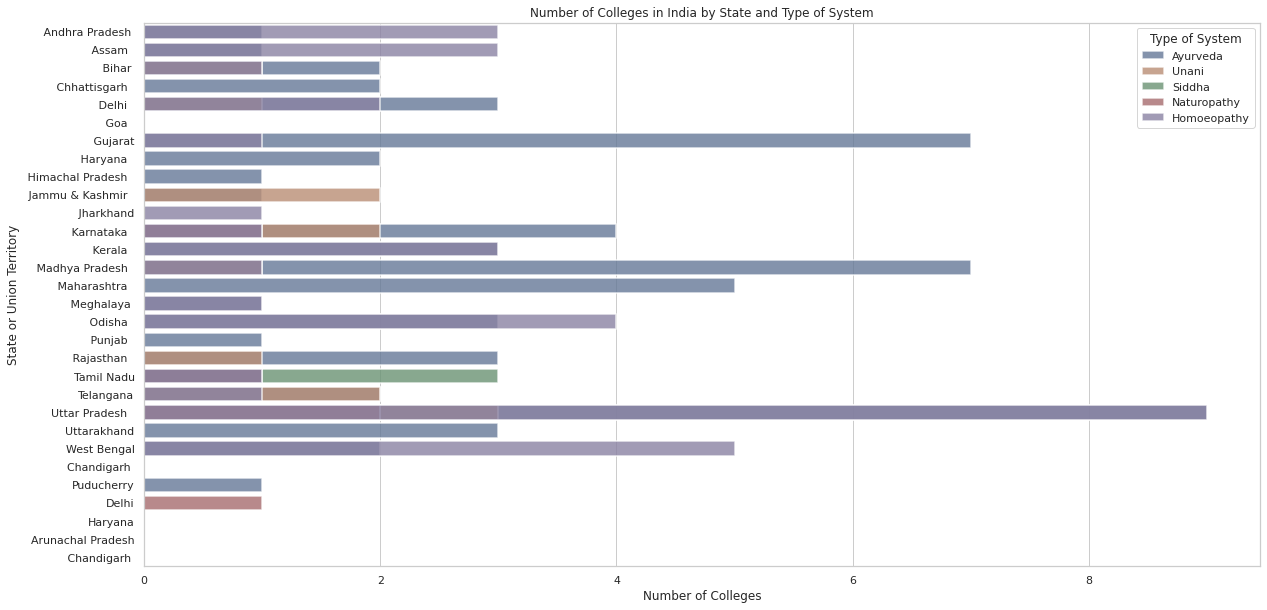

In [ ]:
sns.set_context('poster')
# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


All 3 together for better visualization

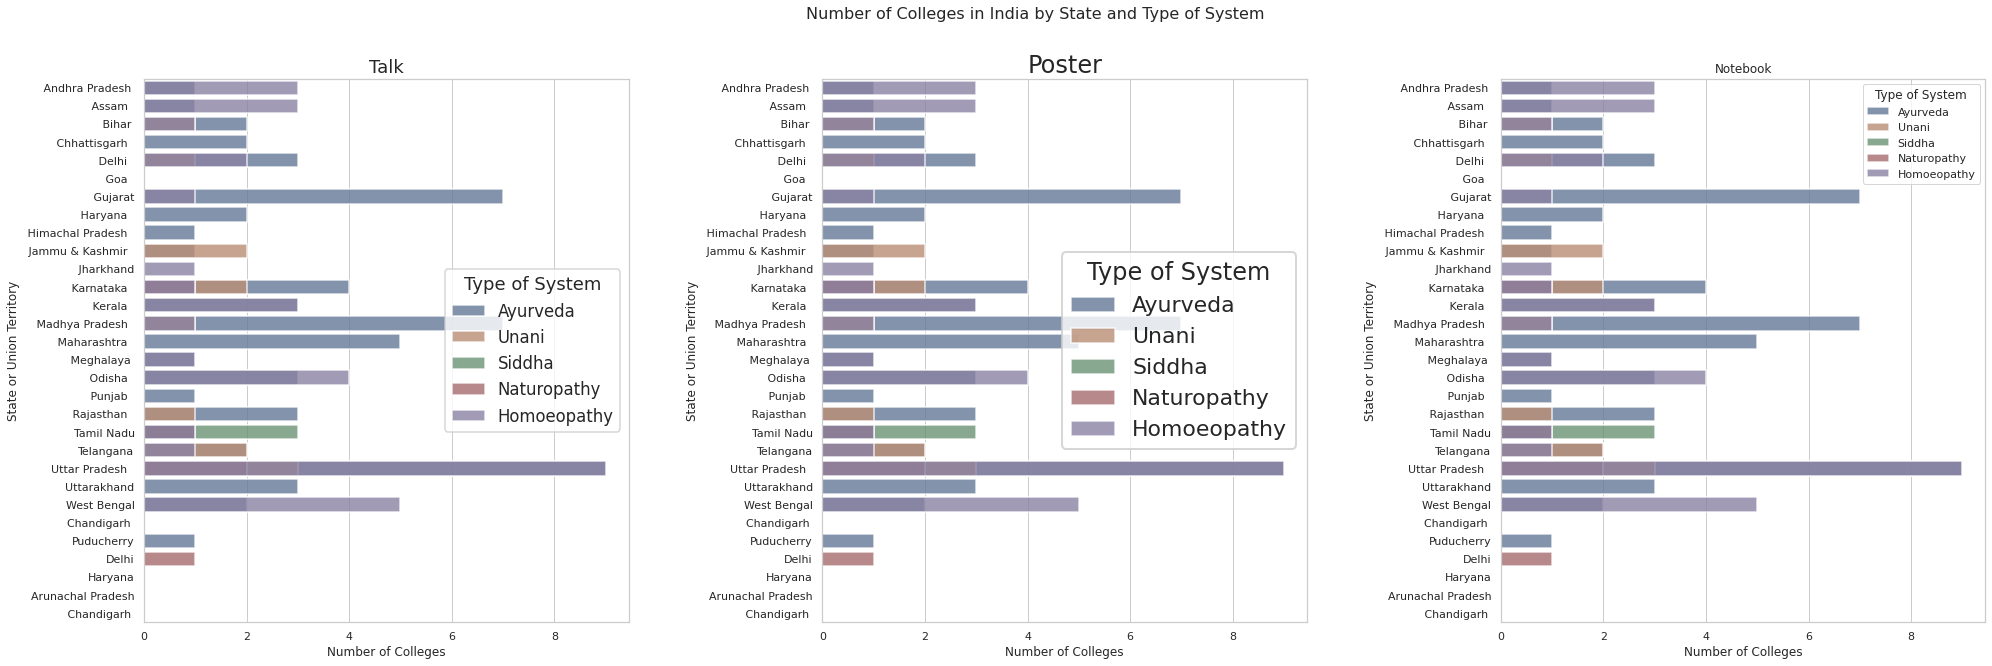

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1

# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Define the list of contexts to use for the subplots
contexts = ['talk', 'poster', 'notebook']

# Create a figure with subplots for each context
fig, axs = plt.subplots(1, len(contexts), figsize=(33,10))

# Use a for loop to plot a stacked barplot on each subplot
for i, ctx in enumerate(contexts):
    sns.set(context=ctx, style='whitegrid')
    sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, ax=axs[i], orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

    axs[i].set(xlabel='Number of Colleges', ylabel='State or Union Territory')
    axs[i].set_title(ctx.capitalize())

# Set the overall title for the plot
fig.suptitle('Number of Colleges in India by State and Type of System', fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


Visualization using various color palettes

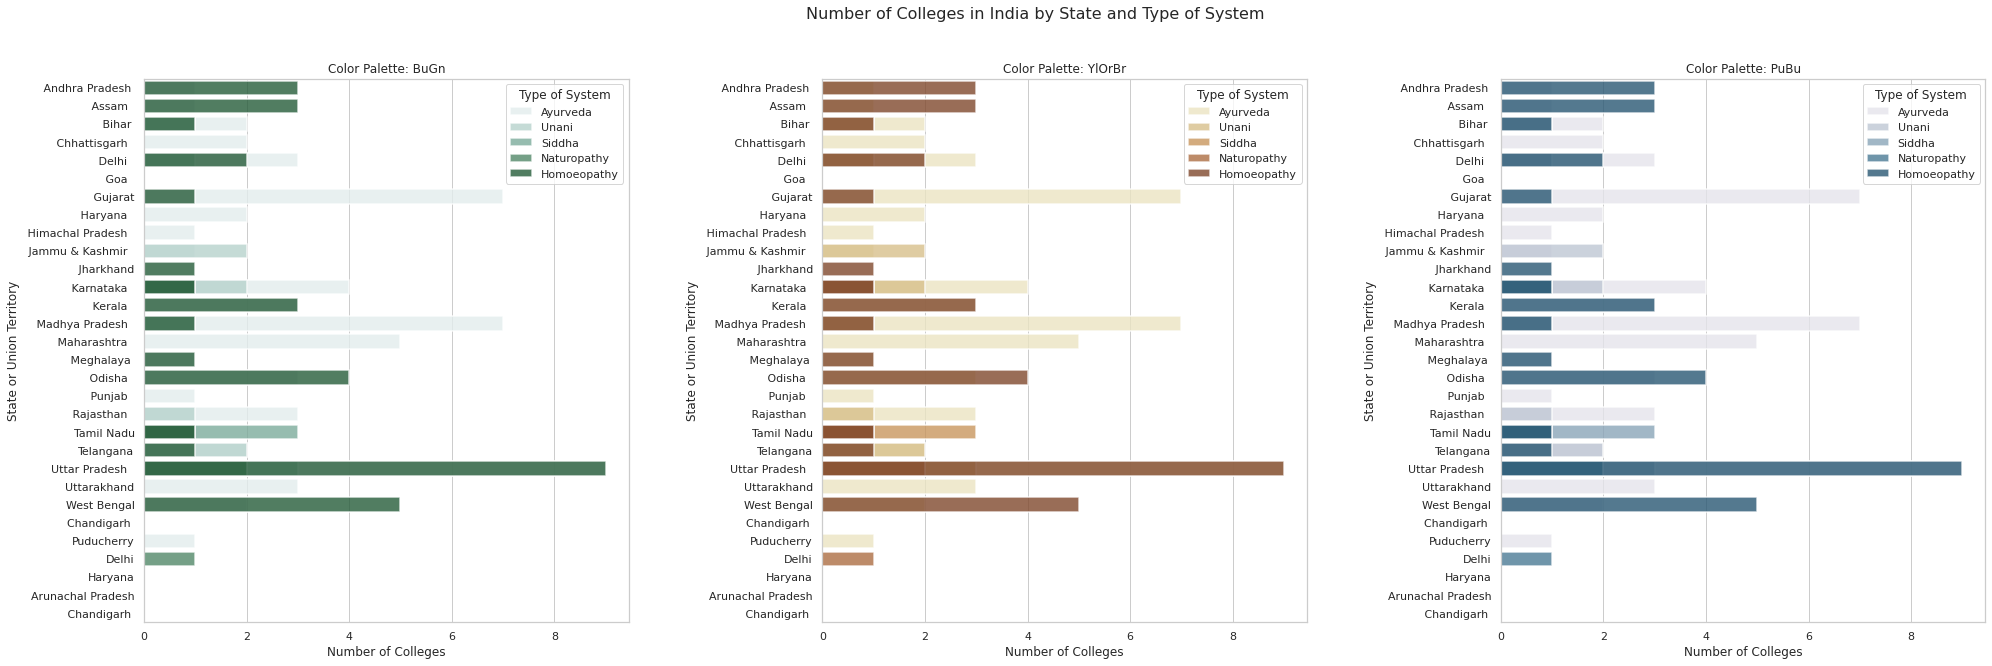

In [ ]:

# Load the data
data = df1

# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Define the list of color palettes to use for the subplots
color_palettes = ['BuGn', 'YlOrBr', 'PuBu']

# Create a figure with subplots for each color palette
fig, axs = plt.subplots(1, len(color_palettes), figsize=(33,10))

# Use a for loop to plot a stacked barplot on each subplot
for i, palette in enumerate(color_palettes):
    sns.set(style='whitegrid')
    sns.barplot(x='No. of Colleges - Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, ax=axs[i], orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8, palette=palette)

    axs[i].set(xlabel='Number of Colleges', ylabel='State or Union Territory')
    axs[i].set_title(f'Color Palette: {palette}')

# Set the overall title for the plot
fig.suptitle('Number of Colleges in India by State and Type of System', fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


Visualizing using treemap

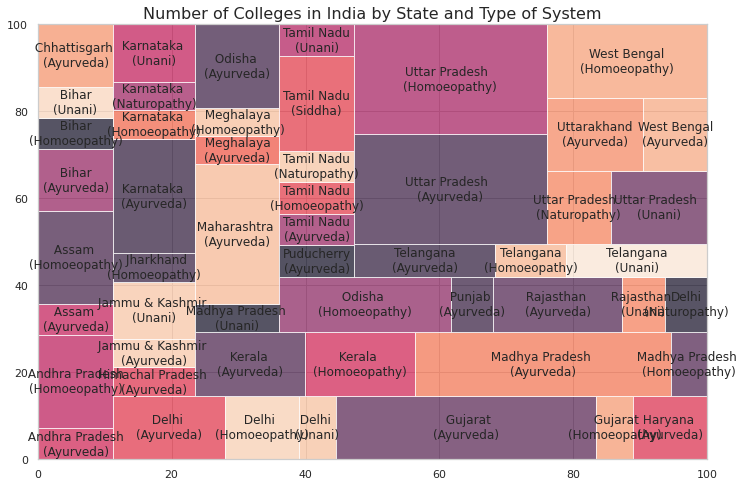

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Load the data
data = df1

# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Aggregate the data by state and type of system
aggregated_data = filtered_data.groupby(['State or Union Territory', 'Type of System']).sum()

# Reset the index of the aggregated data
aggregated_data = aggregated_data.reset_index()

# Filter out any rows with a size of zero
aggregated_data = aggregated_data[aggregated_data['No. of Colleges - Govt'] > 0]

# Define the size of the treemap
plt.figure(figsize=(12,8))

# Create a treemap for the aggregated data
squarify.plot(sizes=aggregated_data['No. of Colleges - Govt'], label=aggregated_data.apply(lambda x: f"{x['State or Union Territory']}\n({x['Type of System']})", axis=1), alpha=.7)

# Add a title to the treemap
plt.title('Number of Colleges in India by State and Type of System', fontsize=16)

# Show the plot
plt.show()


##Visualizing Admission Capacity - Govt and Admission Capacity - Non-Govt

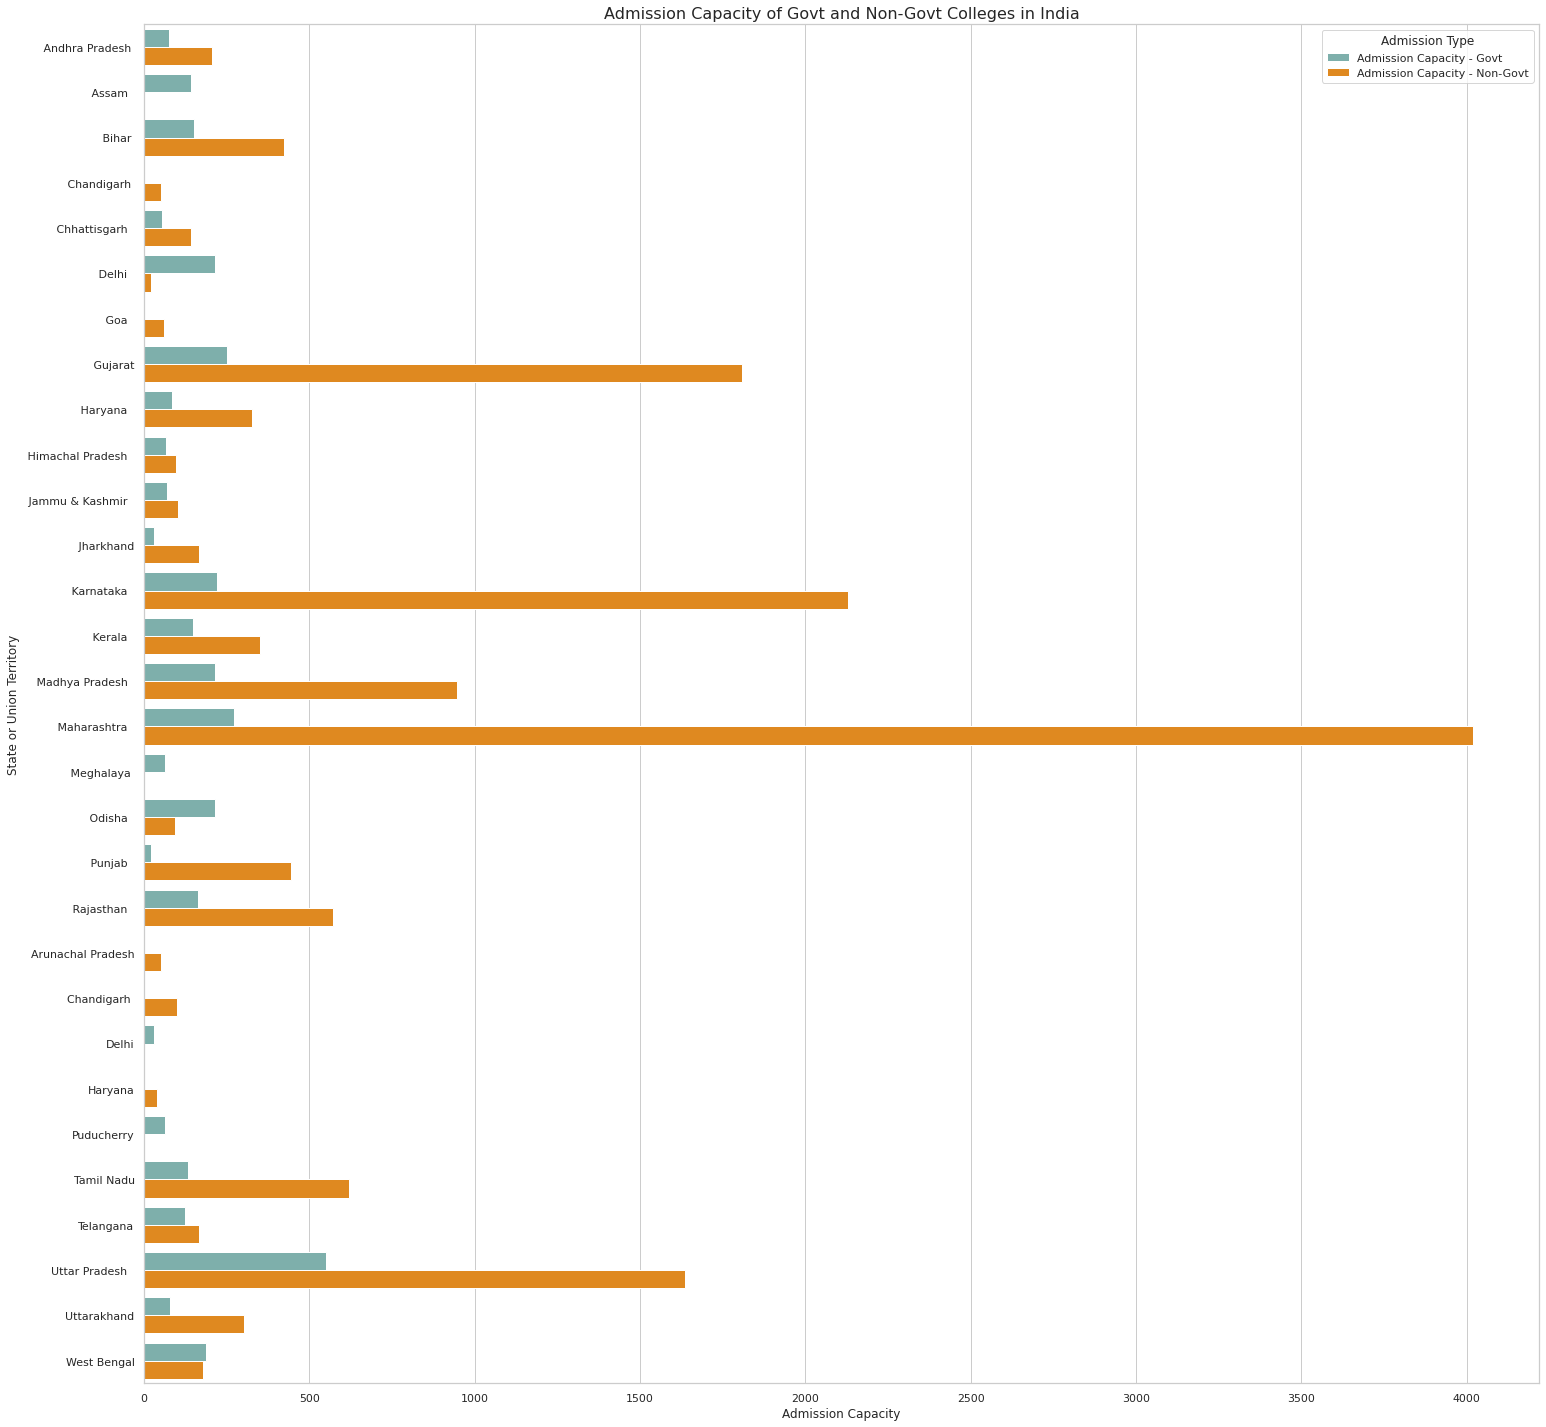

In [ ]:
# Load the data
data = df1
plt.figure(figsize=(25, 25))
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Aggregate the data by state and type of system
aggregated_data = filtered_data.groupby(['State or Union Territory', 'Type of System']).sum().reset_index()

# Melt the data to create separate columns for government and non-government admission capacity
melted_data = pd.melt(aggregated_data, id_vars=['State or Union Territory', 'Type of System'], value_vars=['Admission Capacity - Govt', 'Admission Capacity - Non-Govt'], var_name='Admission Type', value_name='Admission Capacity')

# Create the stacked barplot
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.barplot(x='Admission Capacity', y='State or Union Territory', hue='Admission Type', data=melted_data, palette=['#76b7b2', '#ff8c00'],ci=None)

# Set the title and axis labels
plt.title('Admission Capacity of Govt and Non-Govt Colleges in India', fontsize=16)
plt.xlabel('Admission Capacity')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


##Visualizing No. of Colleges - Non-Govt


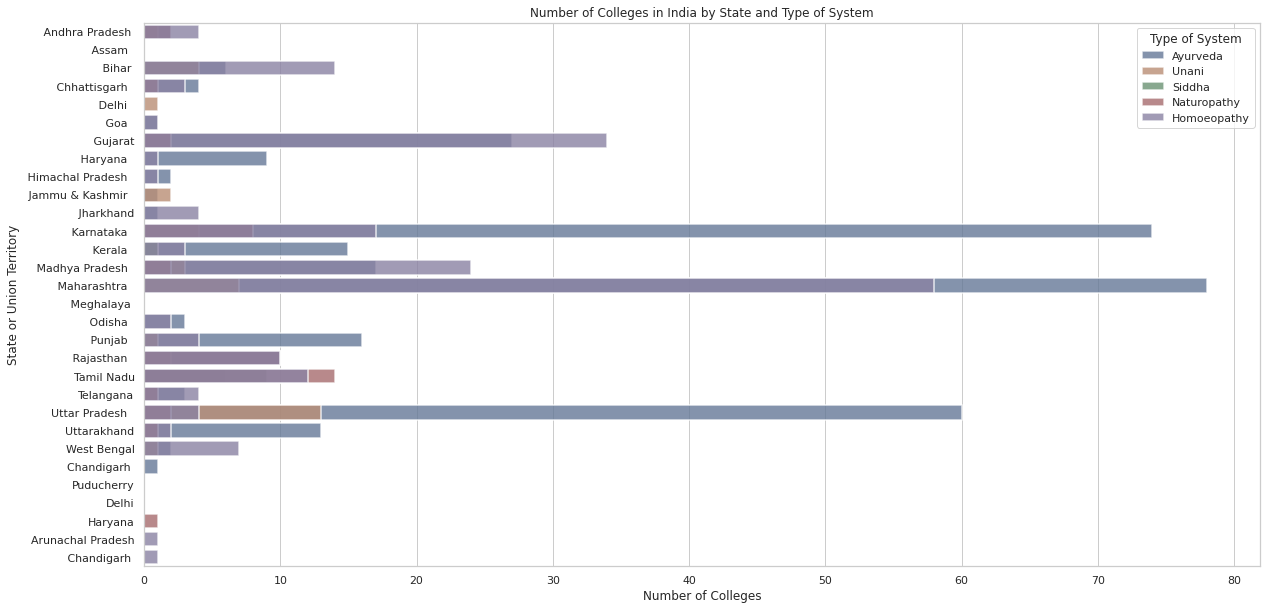

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Non-Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


Screen Display

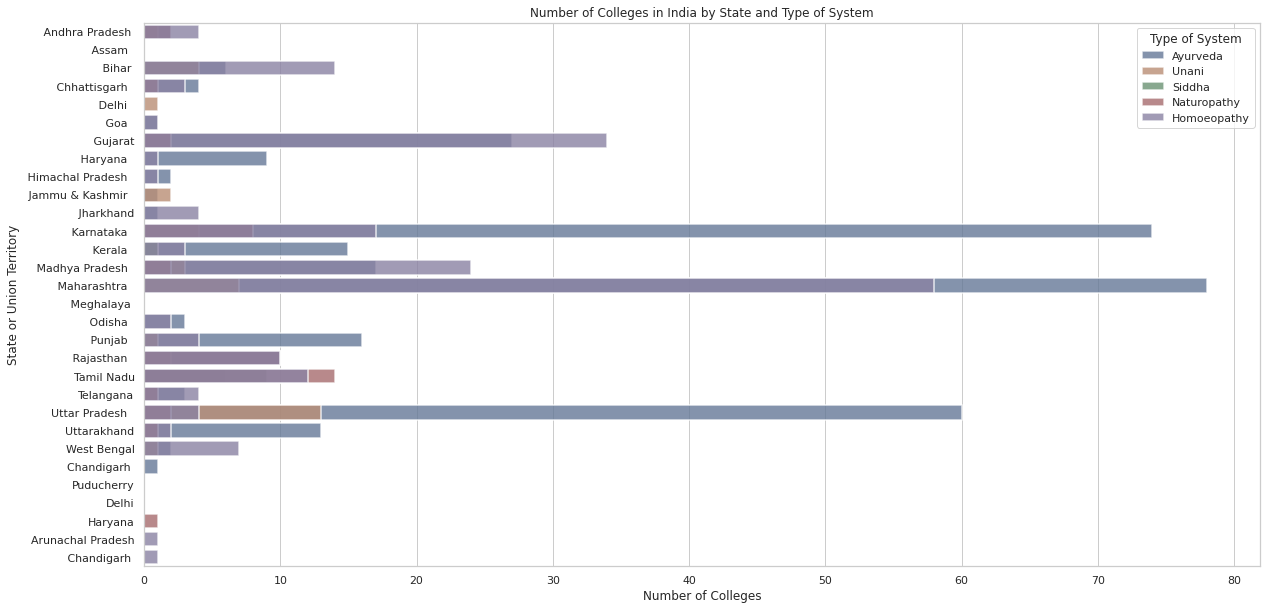

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

sns.set_context('notebook')
# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Non-Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


Presentation

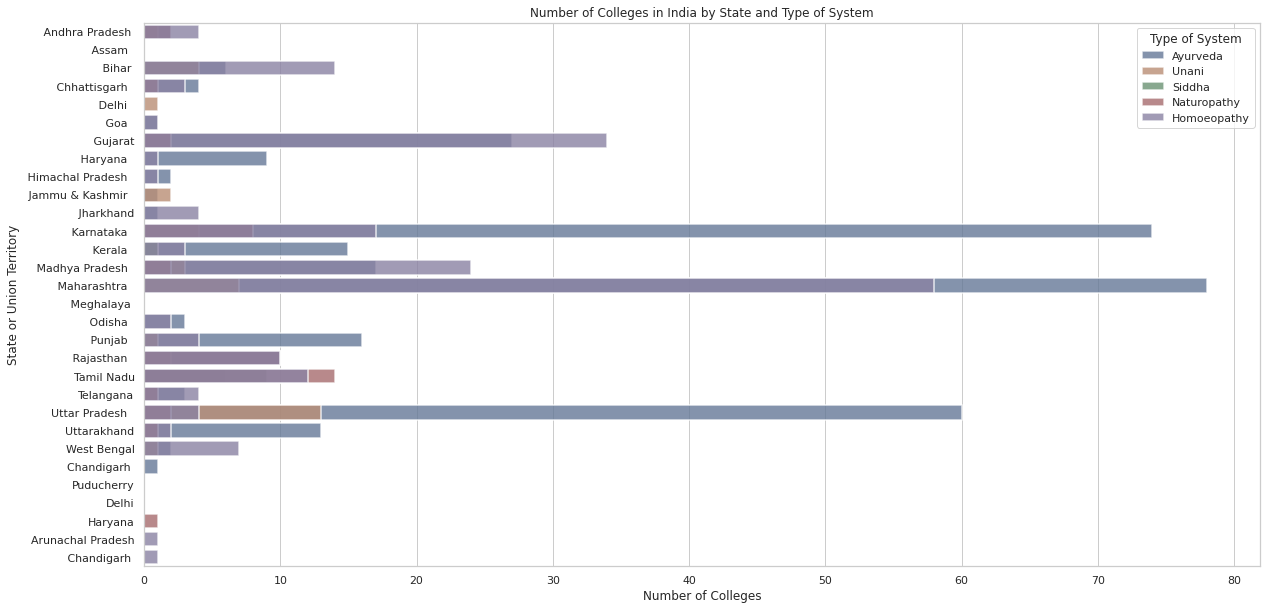

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1
# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

sns.set_context('talk')
# Set the style for the plot
sns.set(style='whitegrid')

# Create the stacked barplot
sns.barplot(x='No. of Colleges - Non-Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

# Set the title and axes labels
plt.title('Number of Colleges in India by State and Type of System')
plt.xlabel('Number of Colleges')
plt.ylabel('State or Union Territory')

# Show the plot
plt.show()


All three in one as subplots

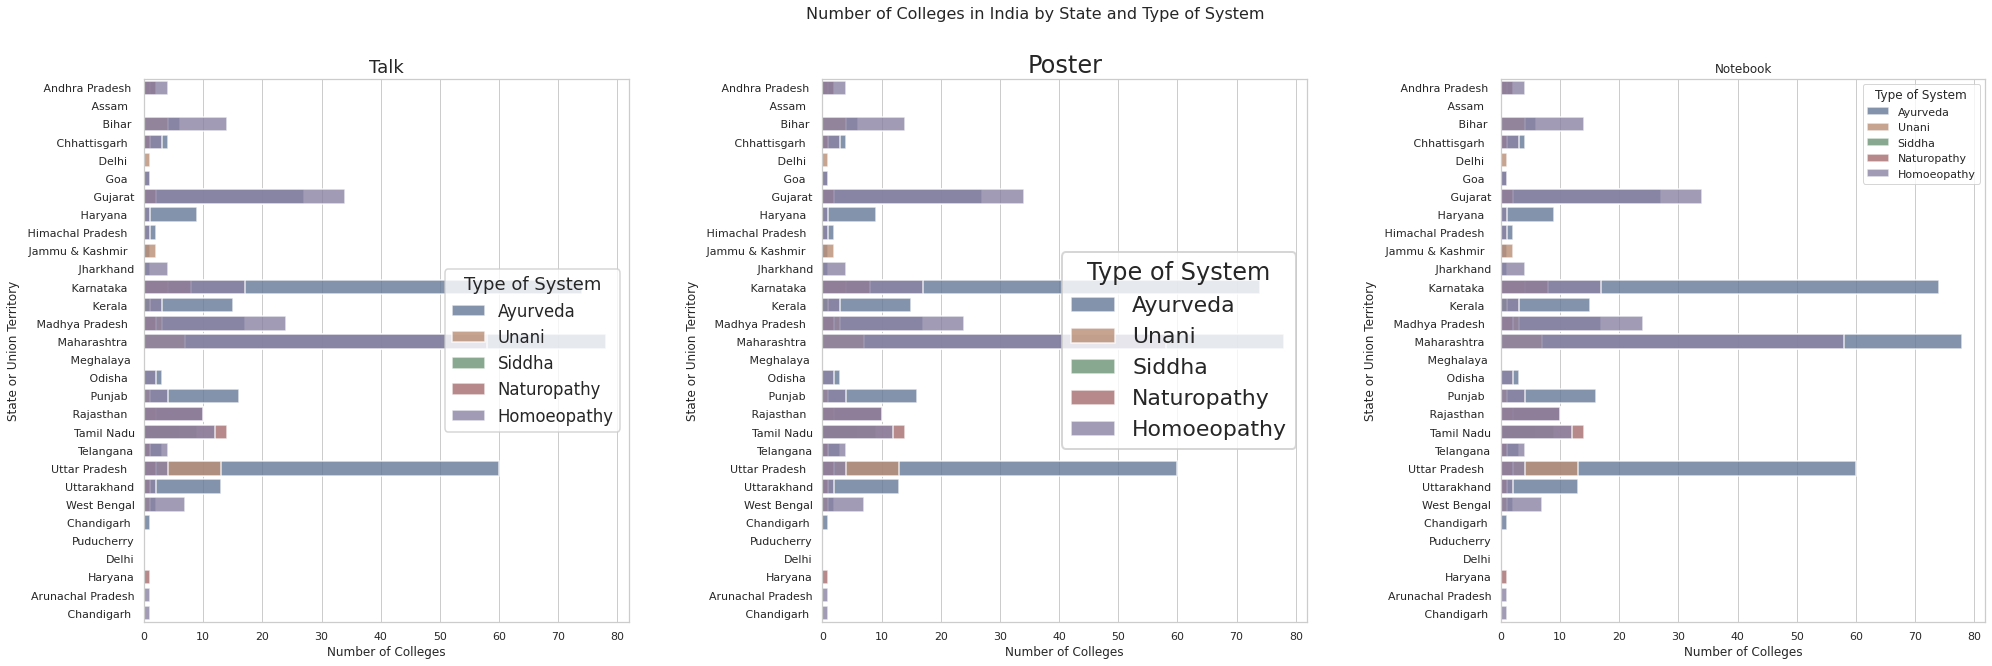

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
data = df1

# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Define the list of contexts to use for the subplots
contexts = ['talk', 'poster', 'notebook']

# Create a figure with subplots for each context
fig, axs = plt.subplots(1, len(contexts), figsize=(33,10))

# Use a for loop to plot a stacked barplot on each subplot
for i, ctx in enumerate(contexts):
    sns.set(context=ctx, style='whitegrid')
    sns.barplot(x='No. of Colleges - Non-Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, ax=axs[i], orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8)

    axs[i].set(xlabel='Number of Colleges', ylabel='State or Union Territory')
    axs[i].set_title(ctx.capitalize())

# Set the overall title for the plot
fig.suptitle('Number of Colleges in India by State and Type of System', fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


Visualizing using color palettes

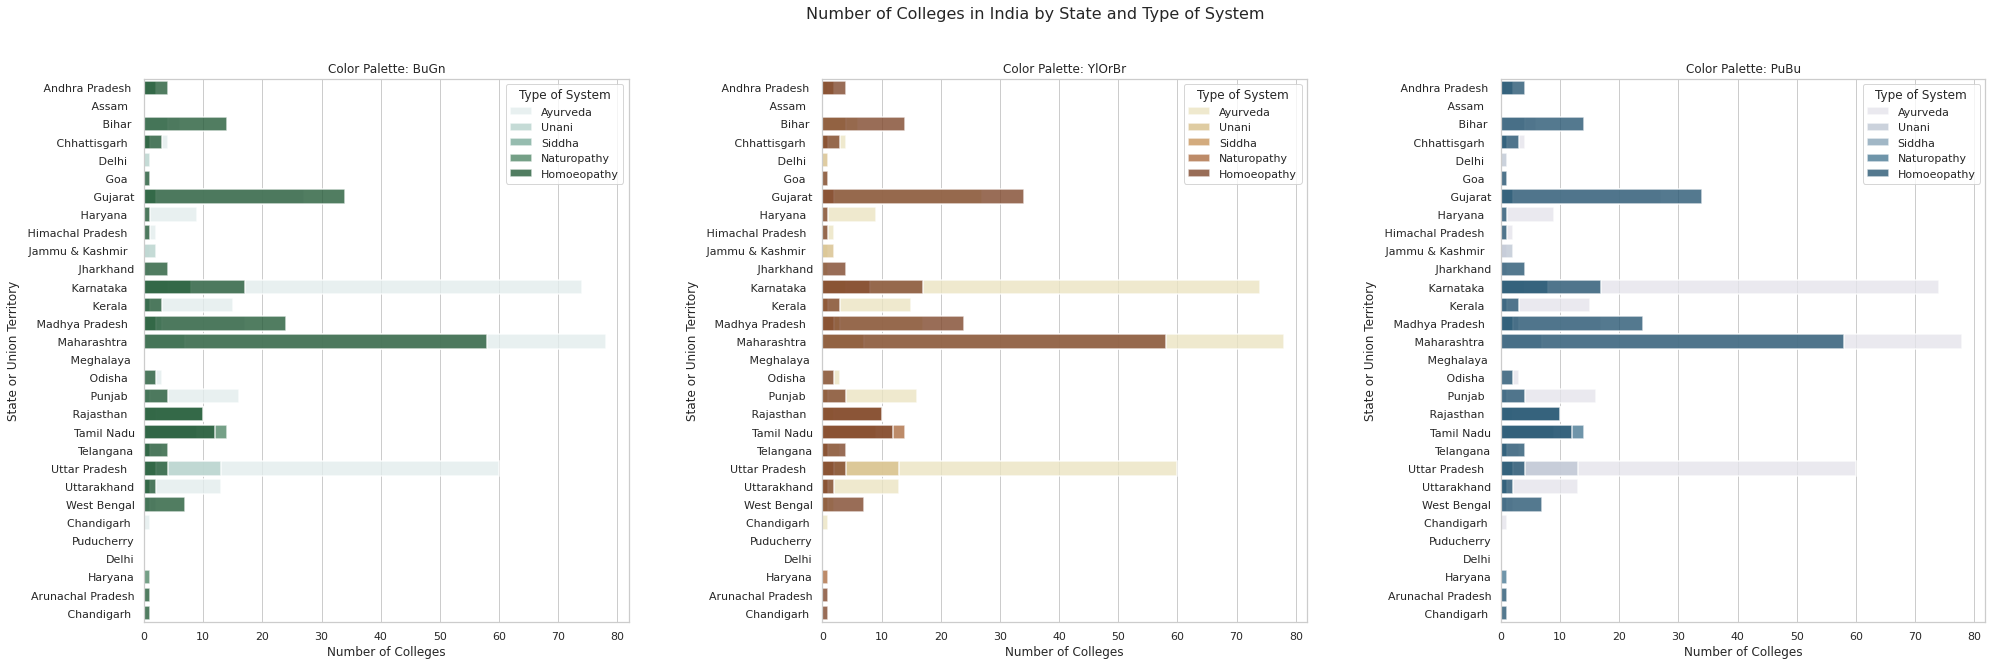

In [ ]:

# Load the data
data = df1

# Filter the data by the type of system
system_types = ['Ayurveda', 'Unani', 'Siddha', 'Naturopathy', 'Homoeopathy']
filtered_data = data[data['Type of System'].isin(system_types)]

# Define the list of color palettes to use for the subplots
color_palettes = ['BuGn', 'YlOrBr', 'PuBu']

# Create a figure with subplots for each color palette
fig, axs = plt.subplots(1, len(color_palettes), figsize=(33,10))

# Use a for loop to plot a stacked barplot on each subplot
for i, palette in enumerate(color_palettes):
    sns.set(style='whitegrid')
    sns.barplot(x='No. of Colleges - Non-Govt', y='State or Union Territory', hue='Type of System', data=filtered_data, ax=axs[i], orient='h', saturation=0.5, dodge=False, ci=None, errcolor='black', errwidth=1.5, capsize=0.1, linewidth=1.5, edgecolor='white', alpha=0.8, palette=palette)

    axs[i].set(xlabel='Number of Colleges', ylabel='State or Union Territory')
    axs[i].set_title(f'Color Palette: {palette}')

# Set the overall title for the plot
fig.suptitle('Number of Colleges in India by State and Type of System', fontsize=16)

# Adjust the spacing between the subplots
fig.subplots_adjust(wspace=0.4)

# Show the plot
plt.show()


#Food Grains Visualization

In [ ]:
df2 = pd.read_csv('/content/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df2.head()

Particulars Frequency    Unit   9-2013  \
0                                 Foodgrains   Monthly  Ton mn    59.24   
1                            Foodgrains Rice   Monthly  Ton mn    19.03   
2  Foodgrains Unmilled Paddy in term of Rice   Monthly  Ton mn     4.11   
3                           Foodgrains Wheat   Monthly  Ton mn    36.10   

    10-2013   11-2013   12-2013   1-2014   2-2014   3-2014   4-2014   5-2014  \
0     62.68     59.69     58.37    55.91    52.48    48.39    63.06    69.85   
1     16.85     14.22     14.70    16.94    18.88    20.28    20.42    20.65   
2     11.73     14.41     15.62    14.77    12.76    10.28     8.24     7.61   
3     34.10     31.07     28.05    24.20    20.84    17.83    34.40    41.59   

    6-2014  
0    65.34  
1    21.24  
2     4.30  
3    39.80

In [ ]:
df2.columns

Index(['Particulars', 'Frequency', 'Unit', ' 9-2013', ' 10-2013', ' 11-2013',
       ' 12-2013', ' 1-2014', ' 2-2014', ' 3-2014', ' 4-2014', ' 5-2014',
       ' 6-2014'],
      dtype='object')

<Figure size 864x576 with 0 Axes>

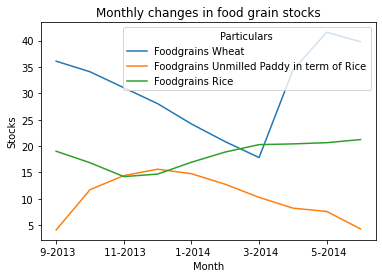

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = df2

# Set the index to 'Particulars'
# df.set_index('Particulars', inplace=True)

# Select only the relevant columns (September 2013 to June 2014)
df = df.loc[:, ' 9-2013':' 6-2014']

# Select only the rows for Wheat, Unmilled Paddy in terms of Rice, and Rice
df = df.loc[['Foodgrains Wheat', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Rice'], :]

# Transpose the dataframe
df = df.T

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the data as a line graph
df.plot(kind='line')

# Set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Stocks')
plt.title('Monthly changes in food grain stocks')

# Show the plot
plt.show()


Using barplots - screen display, presentation and poster print

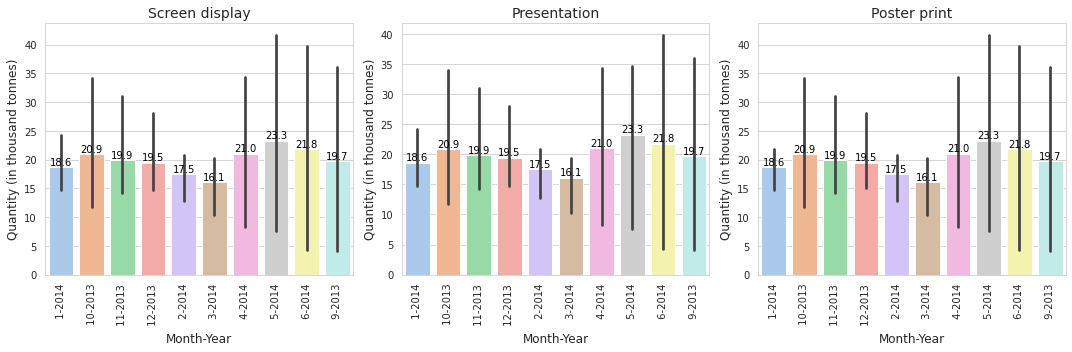

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = df2
# Create a pivot table with three foodgrains
data = df.pivot_table(index='Particulars', values=df.columns[3:], aggfunc=sum)
data = data.loc[['Foodgrains Wheat', 'Foodgrains Unmilled Paddy in term of Rice', 'Foodgrains Rice']]

# Set the figure size
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Generate the plot for each type of output
for i, output_type in enumerate(['Screen display', 'Presentation', 'Poster print']):
    sns.set_style("whitegrid")
    ax = sns.barplot(data=data, palette='pastel', ax=axes[i])
    ax.set_title(output_type, fontsize=14)
    ax.set_xlabel('Month-Year', fontsize=12)
    ax.set_ylabel('Quantity (in thousand tonnes)', fontsize=12)
    ax.tick_params(labelsize=10, length=5)
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
df2 = pd.read_csv('/content/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')
df2

Particulars Frequency    Unit   9-2013  \
0                                 Foodgrains   Monthly  Ton mn    59.24   
1                            Foodgrains Rice   Monthly  Ton mn    19.03   
2  Foodgrains Unmilled Paddy in term of Rice   Monthly  Ton mn     4.11   
3                           Foodgrains Wheat   Monthly  Ton mn    36.10   

    10-2013   11-2013   12-2013   1-2014   2-2014   3-2014   4-2014   5-2014  \
0     62.68     59.69     58.37    55.91    52.48    48.39    63.06    69.85   
1     16.85     14.22     14.70    16.94    18.88    20.28    20.42    20.65   
2     11.73     14.41     15.62    14.77    12.76    10.28     8.24     7.61   
3     34.10     31.07     28.05    24.20    20.84    17.83    34.40    41.59   

    6-2014  
0    65.34  
1    21.24  
2     4.30  
3    39.80

In [ ]:
df2.columns

Index(['Frequency', 'Unit', ' 9-2013', ' 10-2013', ' 11-2013', ' 12-2013',
       ' 1-2014', ' 2-2014', ' 3-2014', ' 4-2014', ' 5-2014', ' 6-2014'],
      dtype='object')

presentation

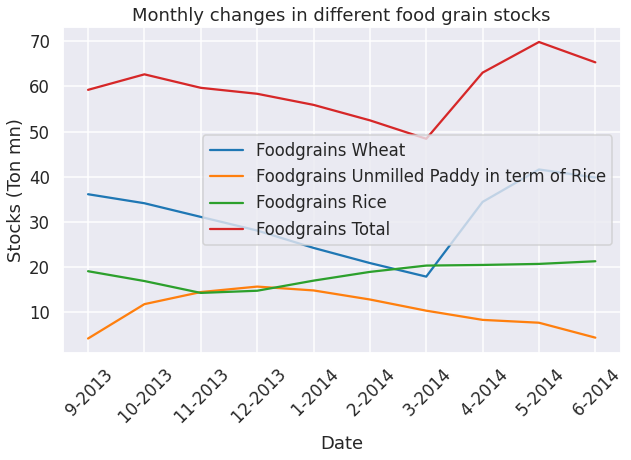

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = df2

# Select the rows for the different foodgrains
foodgrains_wheat = df[df['Particulars'] == 'Foodgrains Wheat']
foodgrains_paddy = df[df['Particulars'] == 'Foodgrains Unmilled Paddy in term of Rice']
foodgrains_rice = df[df['Particulars'] == 'Foodgrains Rice']
foodgrains_total = df[df['Particulars'] == 'Foodgrains']

# Melt the data for plotting
foodgrains_wheat_melt = pd.melt(foodgrains_wheat, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_paddy_melt = pd.melt(foodgrains_paddy, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_rice_melt = pd.melt(foodgrains_rice, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_total_melt = pd.melt(foodgrains_total, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')

# Create a line plot using Seaborn
sns.set_context('talk')
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=foodgrains_wheat_melt, x='Date', y='Stocks', label='Foodgrains Wheat')
sns.lineplot(data=foodgrains_paddy_melt, x='Date', y='Stocks', label='Foodgrains Unmilled Paddy in term of Rice')
sns.lineplot(data=foodgrains_rice_melt, x='Date', y='Stocks', label='Foodgrains Rice')
sns.lineplot(data=foodgrains_total_melt, x='Date', y='Stocks', label='Foodgrains Total')
plt.title("Monthly changes in different food grain stocks")
plt.xlabel("Date")
plt.ylabel("Stocks (Ton mn)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


poster

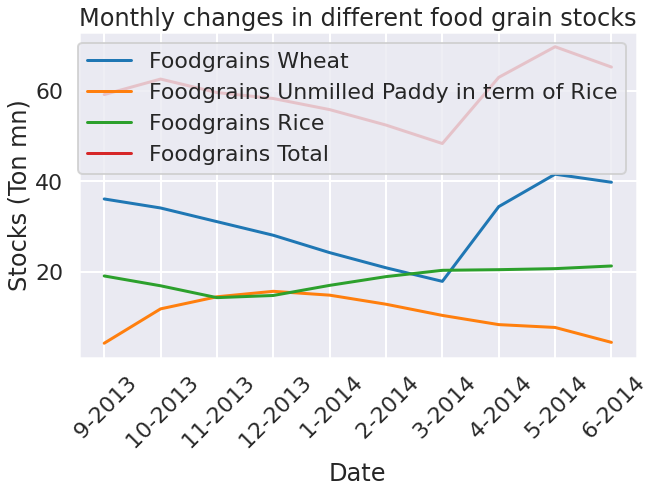

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = df2

# Select the rows for the different foodgrains
foodgrains_wheat = df[df['Particulars'] == 'Foodgrains Wheat']
foodgrains_paddy = df[df['Particulars'] == 'Foodgrains Unmilled Paddy in term of Rice']
foodgrains_rice = df[df['Particulars'] == 'Foodgrains Rice']
foodgrains_total = df[df['Particulars'] == 'Foodgrains']

# Melt the data for plotting
foodgrains_wheat_melt = pd.melt(foodgrains_wheat, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_paddy_melt = pd.melt(foodgrains_paddy, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_rice_melt = pd.melt(foodgrains_rice, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_total_melt = pd.melt(foodgrains_total, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')

# Create a line plot using Seaborn
sns.set_context('poster')
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=foodgrains_wheat_melt, x='Date', y='Stocks', label='Foodgrains Wheat')
sns.lineplot(data=foodgrains_paddy_melt, x='Date', y='Stocks', label='Foodgrains Unmilled Paddy in term of Rice')
sns.lineplot(data=foodgrains_rice_melt, x='Date', y='Stocks', label='Foodgrains Rice')
sns.lineplot(data=foodgrains_total_melt, x='Date', y='Stocks', label='Foodgrains Total')
plt.title("Monthly changes in different food grain stocks")
plt.xlabel("Date")
plt.ylabel("Stocks (Ton mn)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

screen display

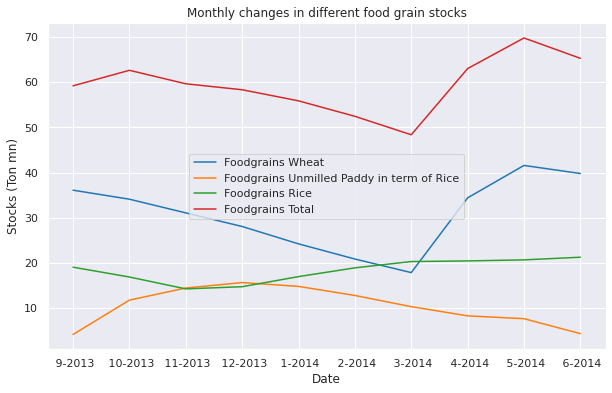

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = df2

# Select the rows for the different foodgrains
foodgrains_wheat = df[df['Particulars'] == 'Foodgrains Wheat']
foodgrains_paddy = df[df['Particulars'] == 'Foodgrains Unmilled Paddy in term of Rice']
foodgrains_rice = df[df['Particulars'] == 'Foodgrains Rice']
foodgrains_total = df[df['Particulars'] == 'Foodgrains']

# Melt the data for plotting
foodgrains_wheat_melt = pd.melt(foodgrains_wheat, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_paddy_melt = pd.melt(foodgrains_paddy, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_rice_melt = pd.melt(foodgrains_rice, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_total_melt = pd.melt(foodgrains_total, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')

# Create a line plot using Seaborn
sns.set_context('notebook')
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
sns.lineplot(data=foodgrains_wheat_melt, x='Date', y='Stocks', label='Foodgrains Wheat')
sns.lineplot(data=foodgrains_paddy_melt, x='Date', y='Stocks', label='Foodgrains Unmilled Paddy in term of Rice')
sns.lineplot(data=foodgrains_rice_melt, x='Date', y='Stocks', label='Foodgrains Rice')
sns.lineplot(data=foodgrains_total_melt, x='Date', y='Stocks', label='Foodgrains Total')
plt.title("Monthly changes in different food grain stocks")
plt.xlabel("Date")
plt.ylabel("Stocks (Ton mn)")
plt.legend()
plt.show()

All three as subplot

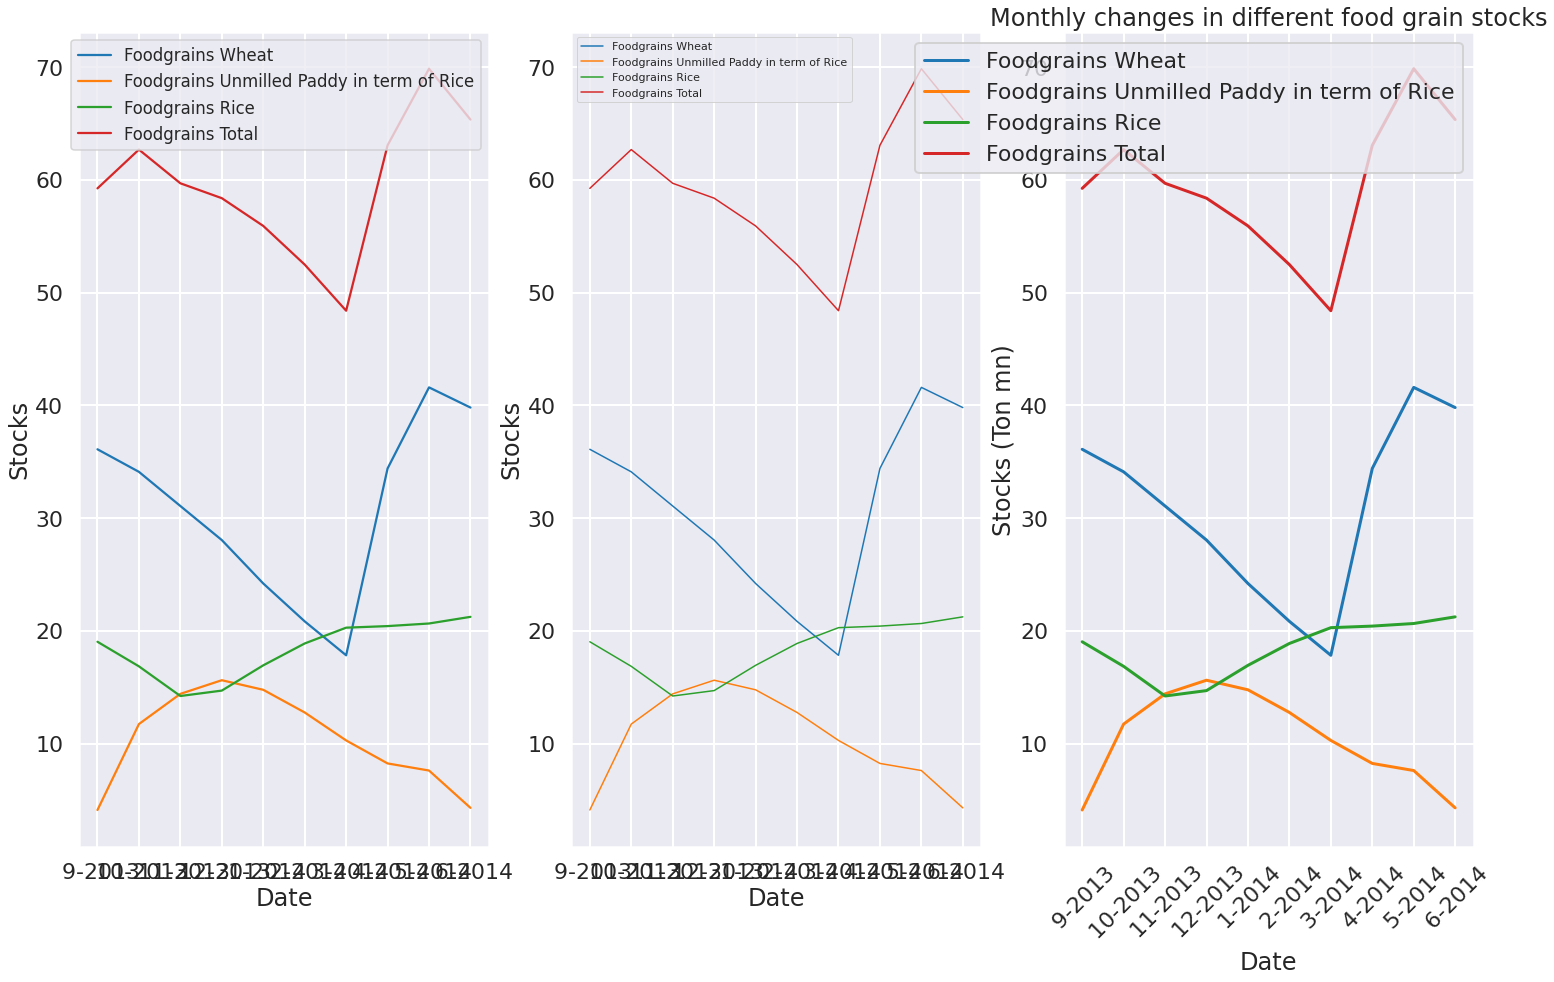

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = df2
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25,15))

# Select the rows for the different foodgrains
foodgrains_wheat = df[df['Particulars'] == 'Foodgrains Wheat']
foodgrains_paddy = df[df['Particulars'] == 'Foodgrains Unmilled Paddy in term of Rice']
foodgrains_rice = df[df['Particulars'] == 'Foodgrains Rice']
foodgrains_total = df[df['Particulars'] == 'Foodgrains']

# Melt the data for plotting
foodgrains_wheat_melt = pd.melt(foodgrains_wheat, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_paddy_melt = pd.melt(foodgrains_paddy, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_rice_melt = pd.melt(foodgrains_rice, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')
foodgrains_total_melt = pd.melt(foodgrains_total, id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Date', value_name='Stocks')

plt.xticks(rotation=45)
for i, output_type in enumerate(['talk', 'notebook', 'poster']):
    sns.set_context(output_type)
    sns.set_style("darkgrid")
    # plt.figure(figsize=(10,6))
    # plt.rcParams['font.size'] = '5'
    sns.lineplot(data=foodgrains_wheat_melt, x='Date', y='Stocks', label='Foodgrains Wheat',ax=axes[i])
    sns.lineplot(data=foodgrains_paddy_melt, x='Date', y='Stocks', label='Foodgrains Unmilled Paddy in term of Rice',ax=axes[i])
    sns.lineplot(data=foodgrains_rice_melt, x='Date', y='Stocks', label='Foodgrains Rice',ax=axes[i])
    sns.lineplot(data=foodgrains_total_melt, x='Date', y='Stocks', label='Foodgrains Total',ax=axes[i])
    x = [1,2,3,4,5,6,7,8,9,10]
    # plt.set_xticks(x)
    plt.xlabel("Date")
    # plt.set_xticklabels(plt.get_xticks(), rotation = 50)
    plt.xticks(rotation=45)
    plt.title("Monthly changes in different food grain stocks")
    
    plt.ylabel("Stocks (Ton mn)")
    # plt.legend()
    # plt.show()

# plt.tight_layout()
plt.show()


Visualizing using various color palettes

  Frequency    Unit         date                                      stock
0   Monthly  Ton mn  Particulars                                 Foodgrains
1   Monthly  Ton mn  Particulars                            Foodgrains Rice
2   Monthly  Ton mn  Particulars  Foodgrains Unmilled Paddy in term of Rice
3   Monthly  Ton mn  Particulars                           Foodgrains Wheat
4   Monthly  Ton mn       9-2013                                      59.24


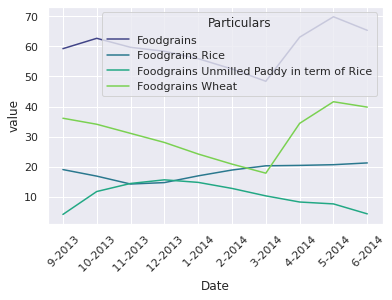

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
df = df2 
# melt the dataframe to long format
df_melted = df.melt(id_vars=['Frequency', 'Unit'], var_name='date', value_name='stock')
print(df_melted.head())
# convert date column to datetime type

# set the plot style
sns.set_style("darkgrid")

# plot the line plot with continuous color palette
sns.lineplot(data=df.melt(id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Month'), 
             x='Month', y='value', hue='Particulars', palette='viridis')

# set the x-axis label and rotate the x-axis ticks for better visibility
plt.xlabel('Date')
plt.xticks(rotation=45)

# show the plot
plt.show()


  Frequency    Unit         date                                      stock
0   Monthly  Ton mn  Particulars                                 Foodgrains
1   Monthly  Ton mn  Particulars                            Foodgrains Rice
2   Monthly  Ton mn  Particulars  Foodgrains Unmilled Paddy in term of Rice
3   Monthly  Ton mn  Particulars                           Foodgrains Wheat
4   Monthly  Ton mn       9-2013                                      59.24


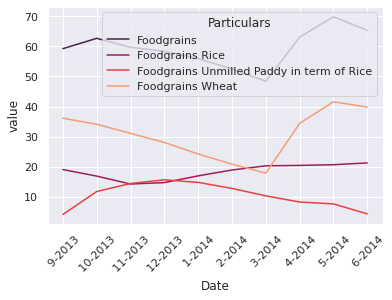

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
df = df2 
# melt the dataframe to long format
df_melted = df.melt(id_vars=['Frequency', 'Unit'], var_name='date', value_name='stock')
print(df_melted.head())
# convert date column to datetime type

# set the plot style
sns.set_style("darkgrid")

# plot the line plot with continuous color palette
sns.lineplot(data=df.melt(id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Month'), 
             x='Month', y='value', hue='Particulars', palette='rocket')

# set the x-axis label and rotate the x-axis ticks for better visibility
plt.xlabel('Date')
plt.xticks(rotation=45)

# show the plot
plt.show()


  Frequency    Unit         date                                      stock
0   Monthly  Ton mn  Particulars                                 Foodgrains
1   Monthly  Ton mn  Particulars                            Foodgrains Rice
2   Monthly  Ton mn  Particulars  Foodgrains Unmilled Paddy in term of Rice
3   Monthly  Ton mn  Particulars                           Foodgrains Wheat
4   Monthly  Ton mn       9-2013                                      59.24


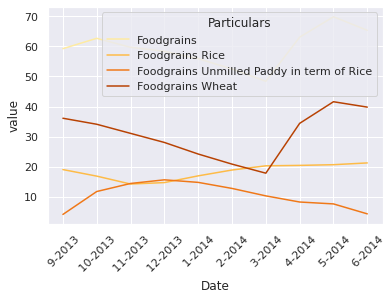

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
df = df2 
# melt the dataframe to long format
df_melted = df.melt(id_vars=['Frequency', 'Unit'], var_name='date', value_name='stock')
print(df_melted.head())
# convert date column to datetime type

# set the plot style
sns.set_style("darkgrid")

# plot the line plot with continuous color palette
sns.lineplot(data=df.melt(id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Month'), 
             x='Month', y='value', hue='Particulars', palette='YlOrBr')

# set the x-axis label and rotate the x-axis ticks for better visibility
plt.xlabel('Date')
plt.xticks(rotation=45)

# show the plot
plt.show()


  Frequency    Unit         date                                      stock
0   Monthly  Ton mn  Particulars                                 Foodgrains
1   Monthly  Ton mn  Particulars                            Foodgrains Rice
2   Monthly  Ton mn  Particulars  Foodgrains Unmilled Paddy in term of Rice
3   Monthly  Ton mn  Particulars                           Foodgrains Wheat
4   Monthly  Ton mn       9-2013                                      59.24


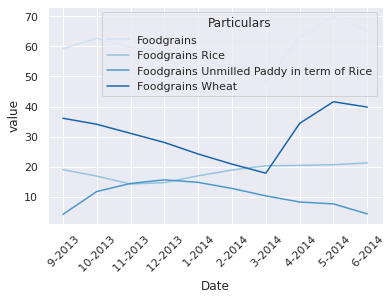

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
df = df2 
# melt the dataframe to long format
df_melted = df.melt(id_vars=['Frequency', 'Unit'], var_name='date', value_name='stock')
print(df_melted.head())
# convert date column to datetime type

# set the plot style
sns.set_style("darkgrid")

# plot the line plot with continuous color palette
sns.lineplot(data=df.melt(id_vars=['Particulars', 'Frequency', 'Unit'], var_name='Month'), 
             x='Month', y='value', hue='Particulars', palette='Blues')

# set the x-axis label and rotate the x-axis ticks for better visibility
plt.xlabel('Date')
plt.xticks(rotation=45)

# show the plot
plt.show()


#Road Transport Data Visualization

In [ ]:
df3 = pd.read_csv('/content/Road_Transport_BRS_2017-18_Annexure7_9c.csv')
df3.head()

Name of the States  National Highways  State Highways  District Roads  \
0     Andhra Pradesh              10207           15753           58083   
1  Arunachal Pradesh               2537           13500            8731   
2              Assam               3909            2530            6093   
3              Bihar               4877            4006           11145   
4       Chhattisgarh               3592            4176           11965   

   Rural Roads  Urban Roads  Project Roads  Total road Length  \
0       217892        34878           9447             346260   
1        20807           56           4924              50555   
2       303672         5603          21803             343609   
3       258800         9184           2559             290571   
4        54308        12765          15772             102578   

   Total Population  Road length per '000 pop  \
0             84581                      4.09   
1              1384                     36.54   
2             31206                     11.01   
3            104099                      2.79   
4             25545                      4.02   

   Road length per '000  Population - National Highways  \
0                                               0.12      
1                                               1.83      
2                                               0.13      
3                                               0.05      
4                                               0.14      

   Road length per '000  Population - State Highways  \
0                                               0.19   
1                                               9.76   
2                                               0.08   
3                                               0.04   
4                                               0.16   

   Road length per '000  Population - District Roads  \
0                                               0.69   
1                                               6.31   
2                                               0.20   
3                                               0.11   
4                                               0.47   

   Road length per '000  Population - Rural Roads  \
0                                            2.58   
1                                           15.04   
2                                            9.73   
3                                            2.49   
4                                            2.13   

   Road length per '000  Population - Urban roads  \
0                                            0.41   
1                                            0.04   
2                                            0.18   
3                                            0.09   
4                                            0.50   

   Road length per '000  Population - Project Roads  
0                                              0.11  
1                                              3.56  
2                                              0.70  
3                                              0.02  
4                                              0.62

In [ ]:
l = list(df3['Name of the States'])


Visualizing using pie chart - National Highways

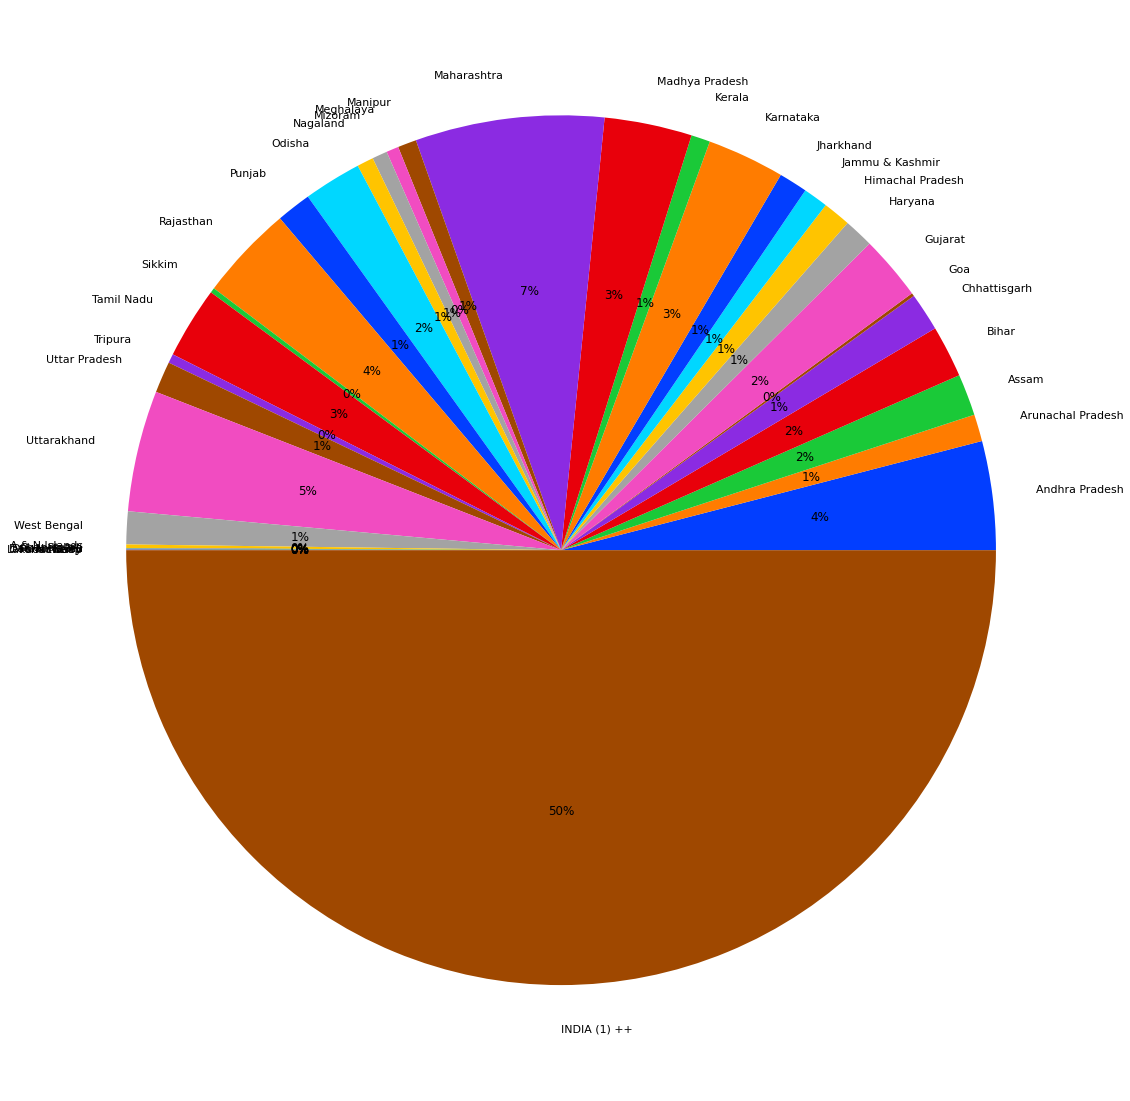

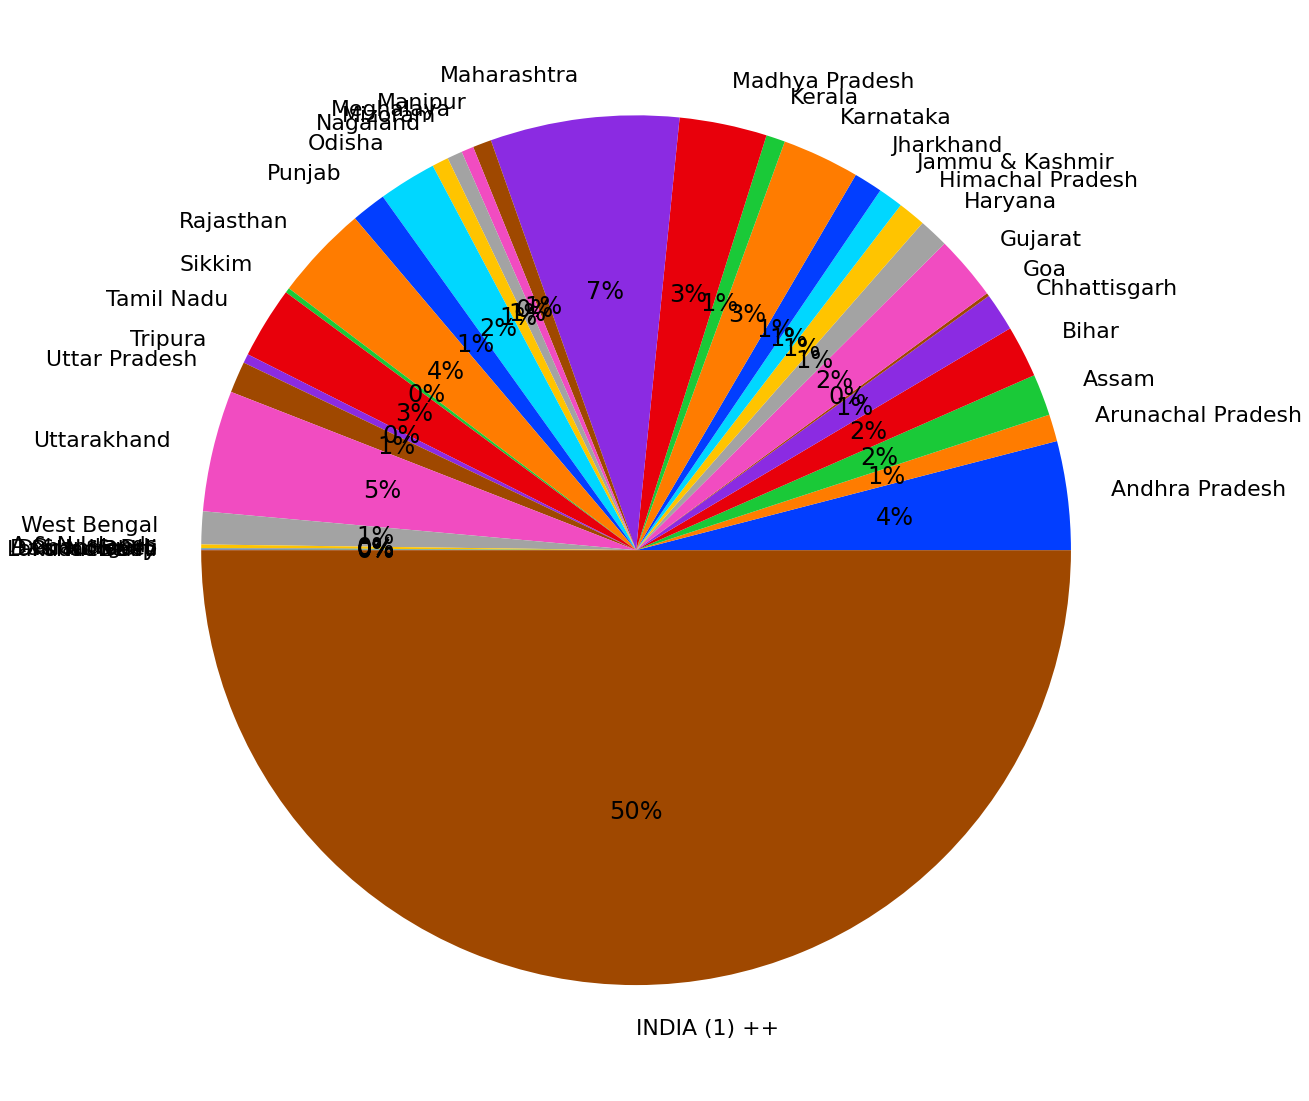

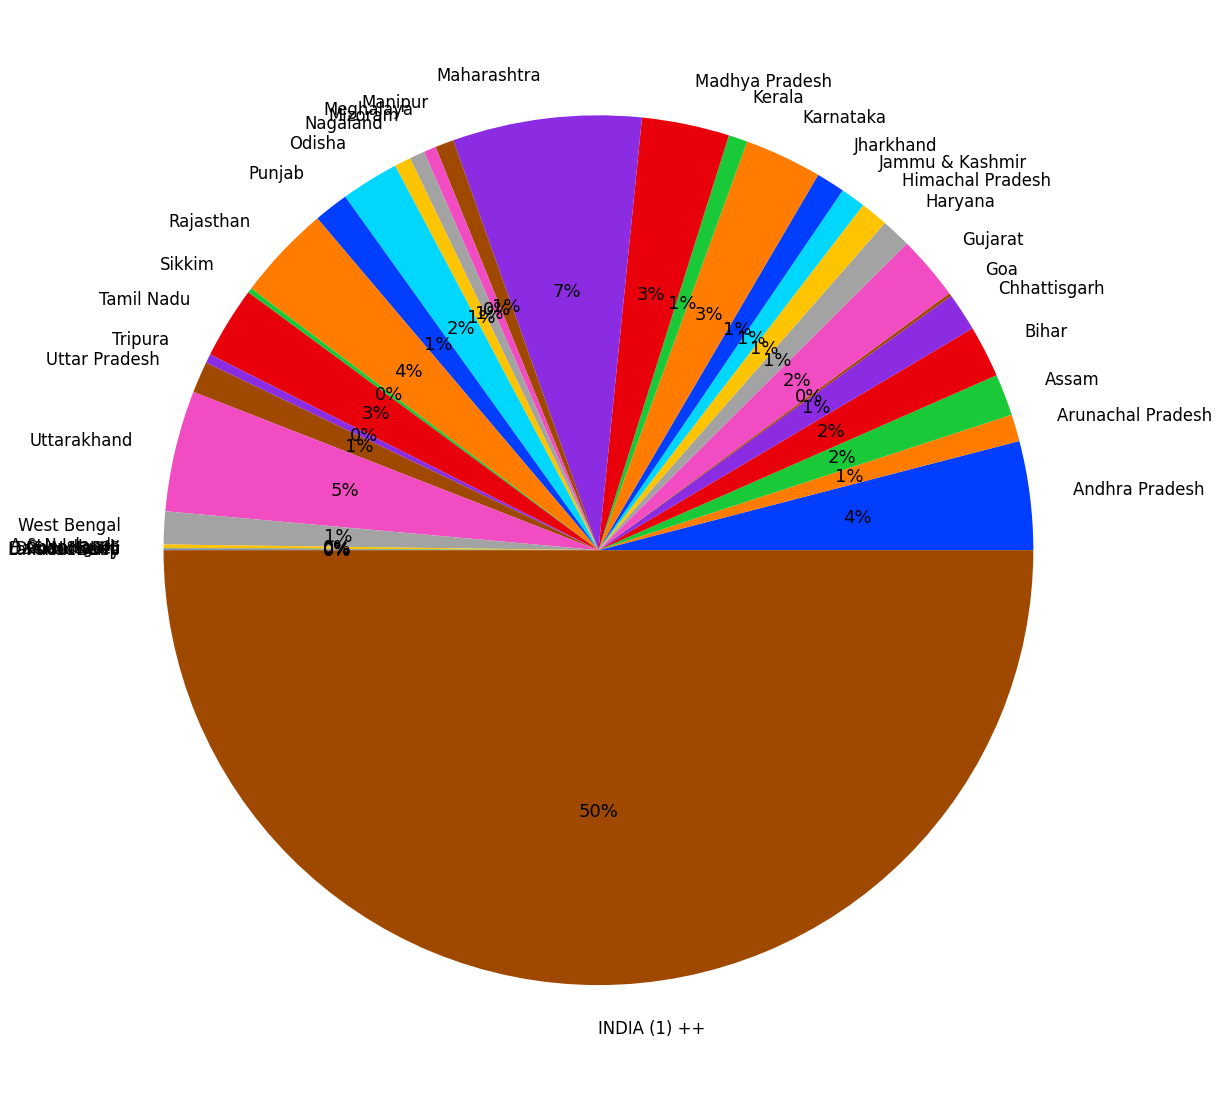

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(80, 40))
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3['National Highways'],labels=l, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()
plt.figure(figsize=(60, 20))
sns.set_context('poster')
plt.pie(df3['National Highways'],labels=l, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()
plt.figure(figsize=(60, 20))
sns.set_context('talk')
plt.pie(df3['National Highways'],labels=l, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

Visualizing using pie chart State Highways

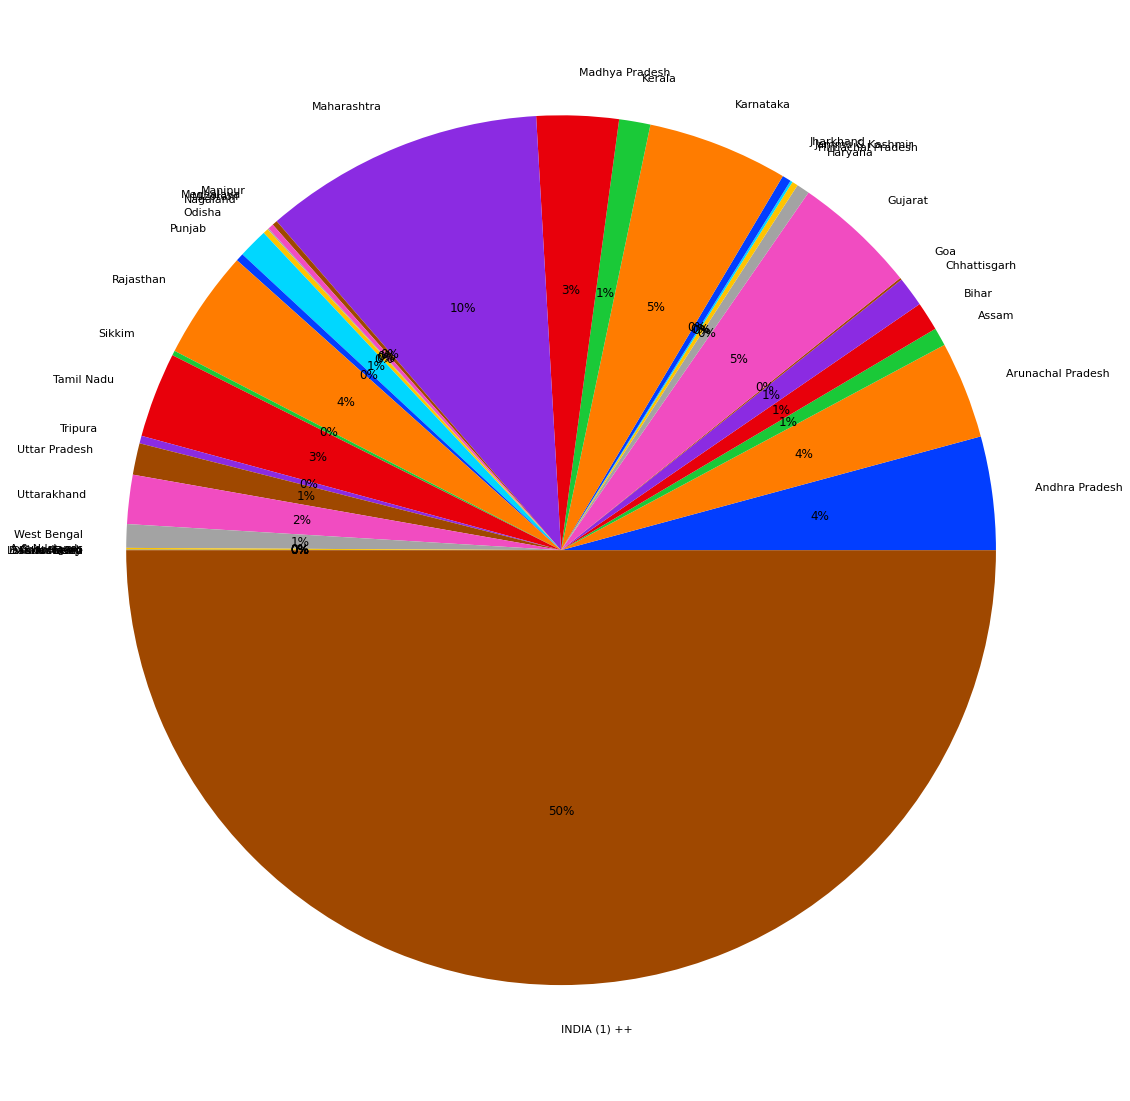

In [ ]:
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(80, 40))
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3['State Highways'],labels=l, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

Visualizing using pie chart Road length per '000  Population - National Highways and State Higways

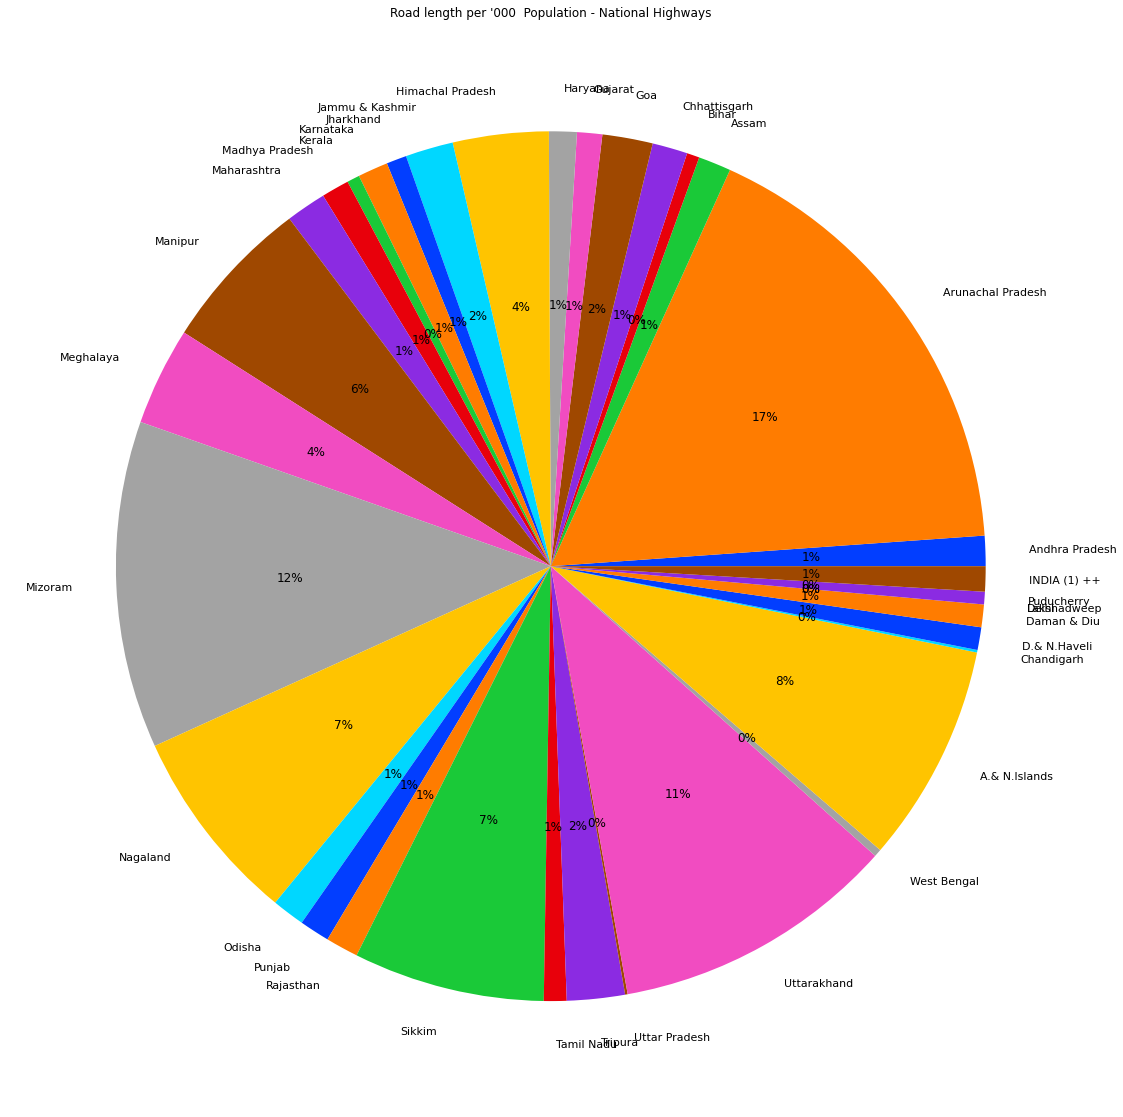

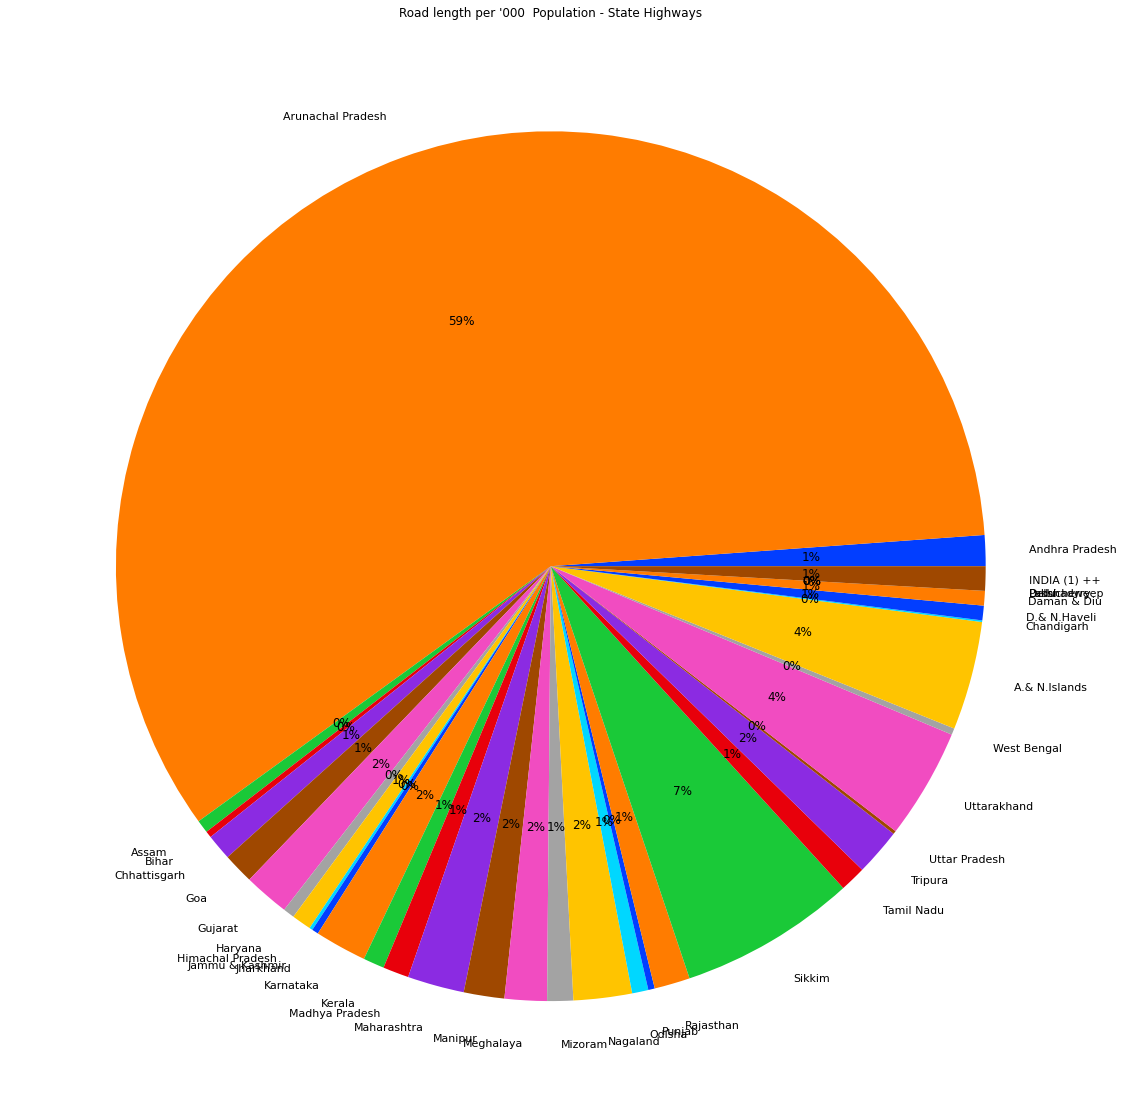

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - National Highways"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - National Highways")
plt.show()
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - State Highways"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - State Highways")
plt.show()

Road length per '000  Population - District, Rural, Urban, Project Roads

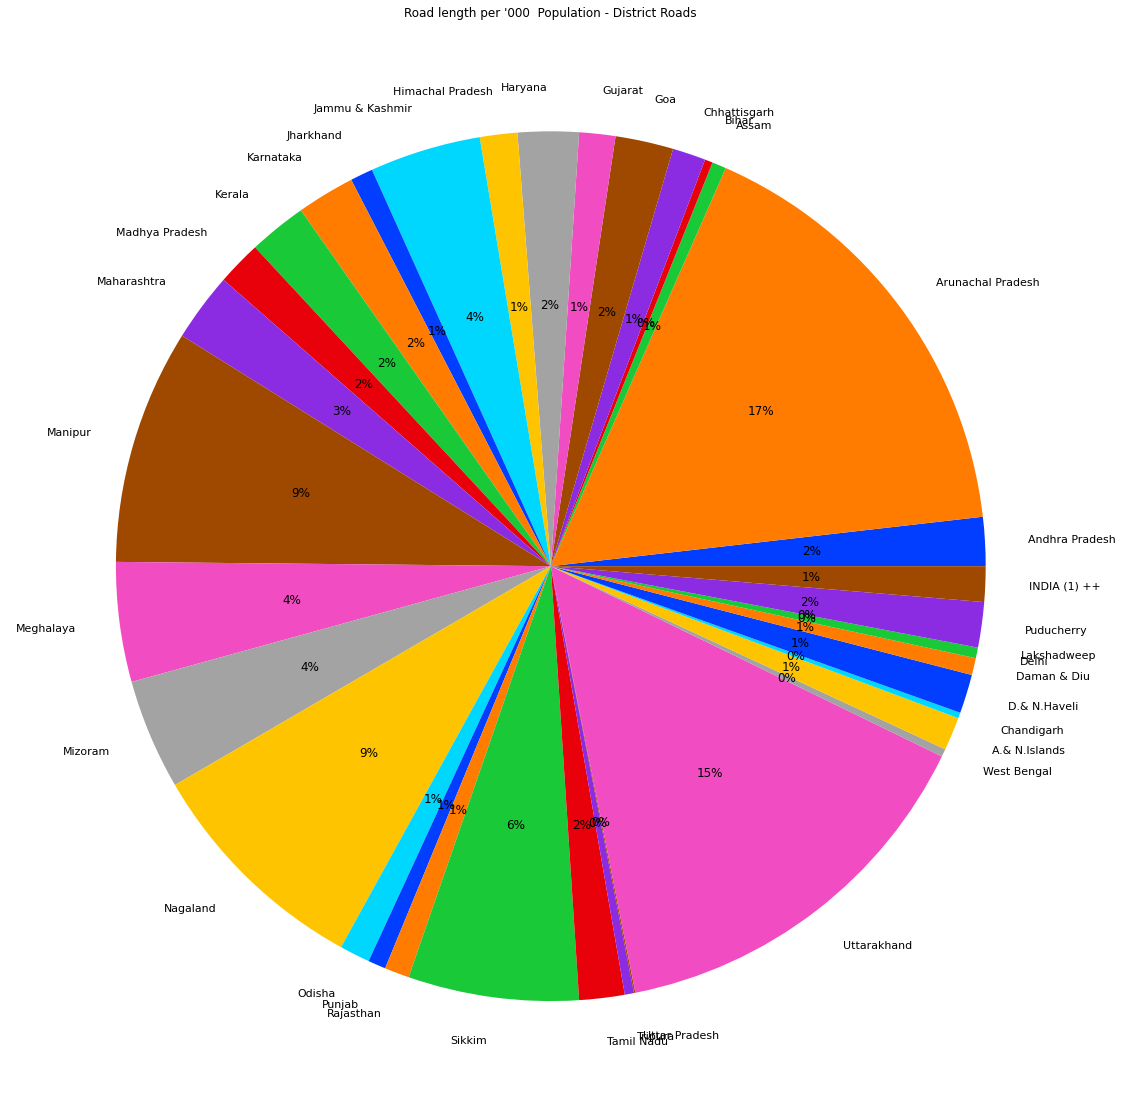

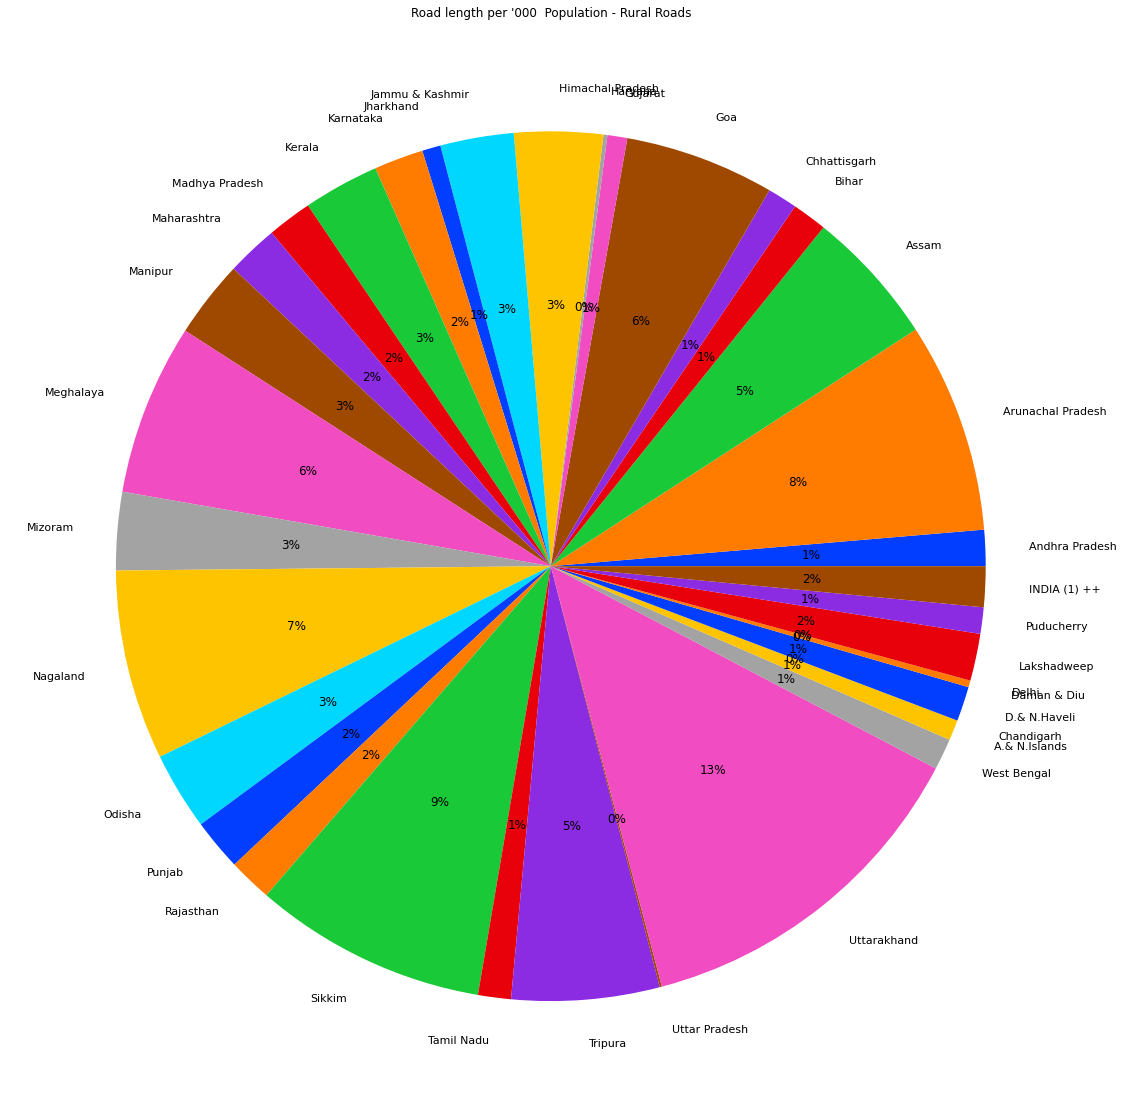

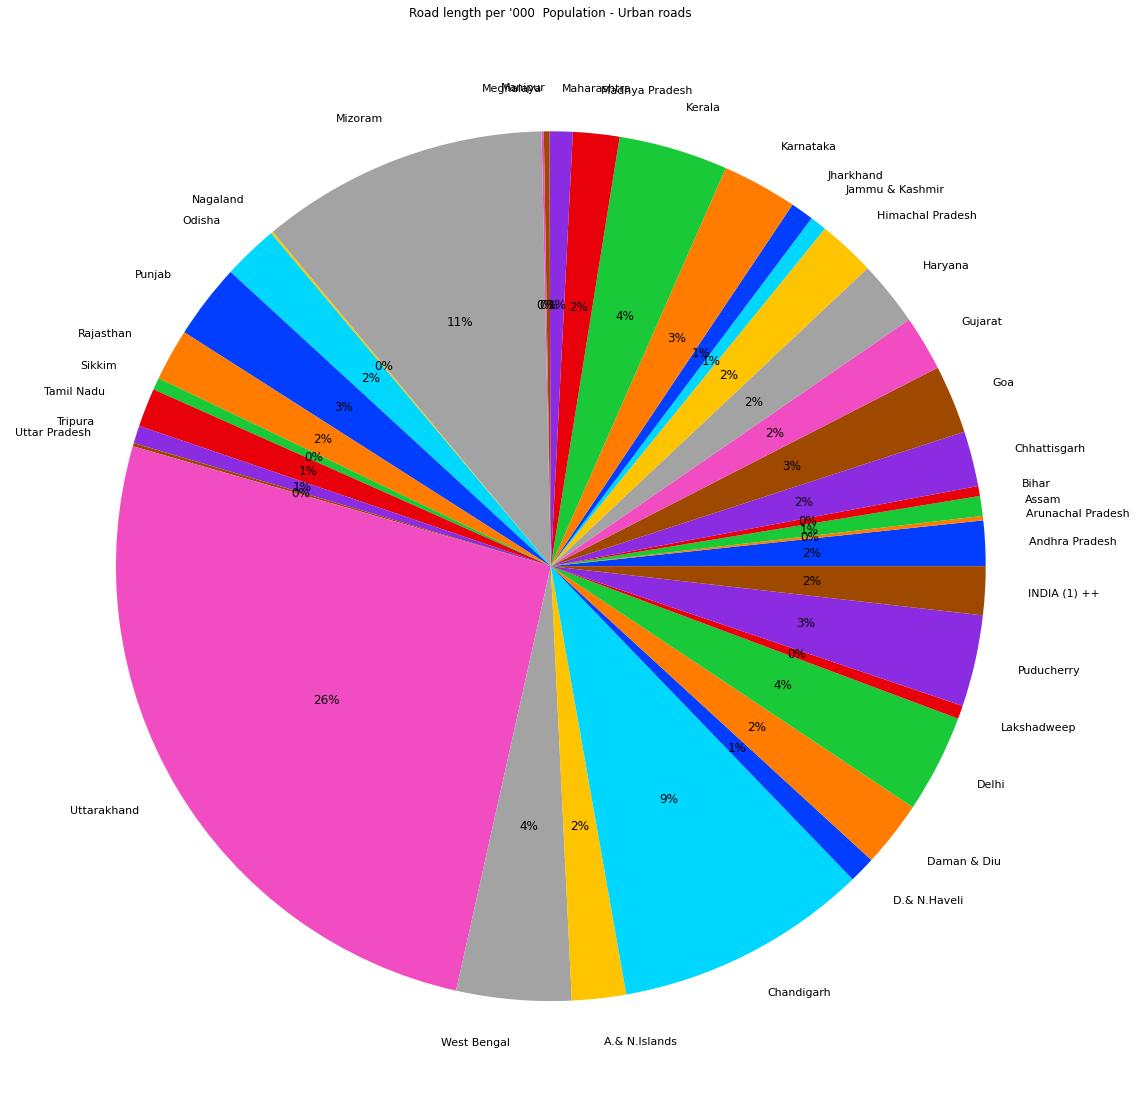

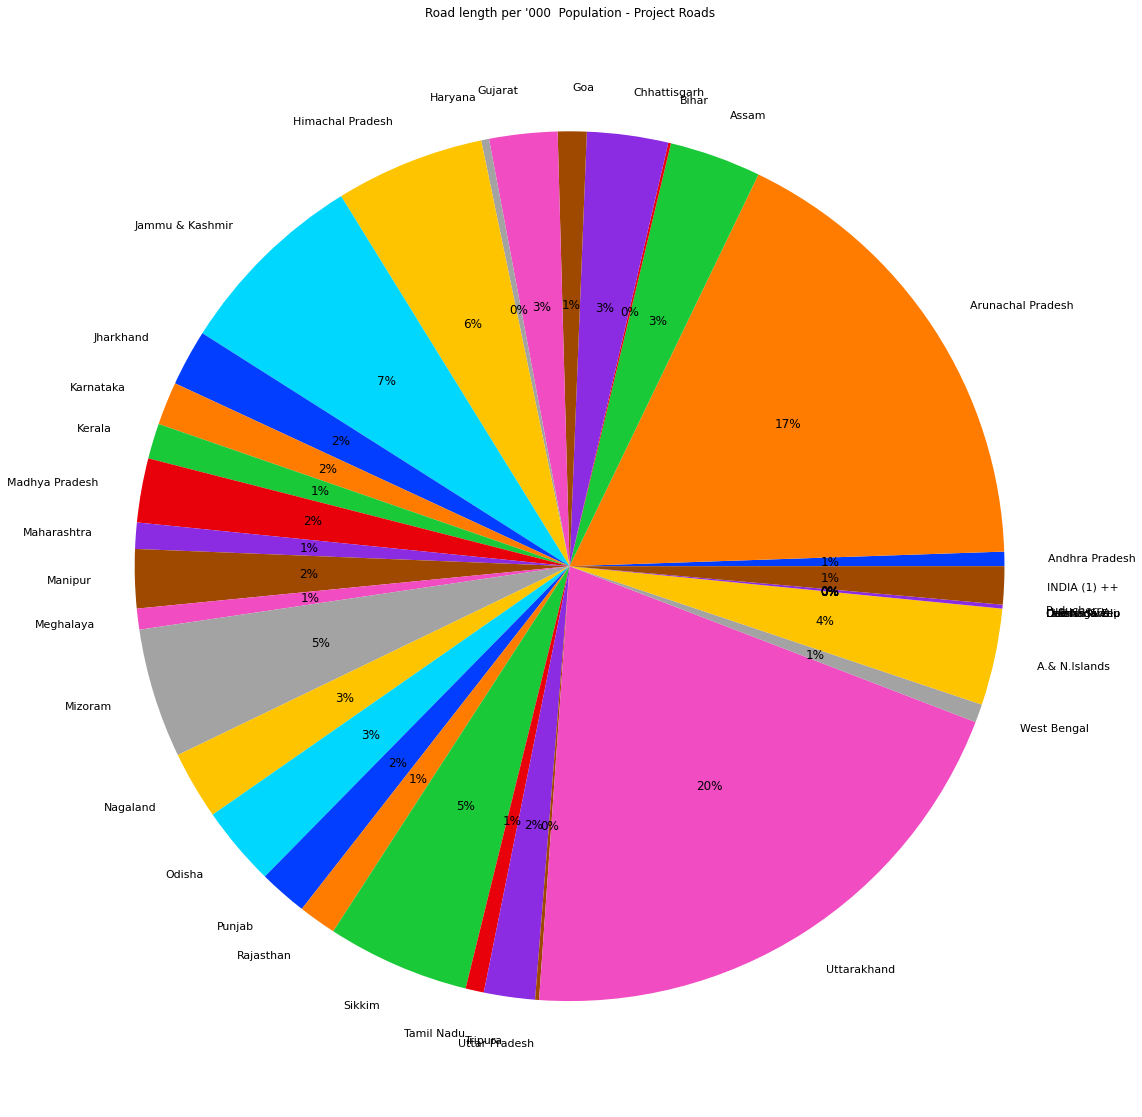

In [ ]:
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - District Roads"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - District Roads")
plt.show()
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - Rural Roads"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - Rural Roads")
plt.show()
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - Urban roads"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - Urban roads")
plt.show()
sns.set_context('notebook')
plt.figure(figsize=(60, 20))
plt.pie(df3["Road length per '000  Population - Project Roads"],labels=l, colors=sns.color_palette('bright'),autopct='%.0f%%')
plt.title("Road length per '000  Population - Project Roads")
plt.show()

In [ ]:
df3.columns

Index(['Name of the States', 'National Highways', 'State Highways',
       'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads',
       'Total road Length', 'Total Population', 'Road length per '000 pop',
       'Road length per '000  Population - National Highways',
       'Road length per '000  Population - State Highways',
       'Road length per '000  Population - District Roads',
       'Road length per '000  Population - Rural Roads',
       'Road length per '000  Population - Urban roads',
       'Road length per '000  Population - Project Roads'],
      dtype='object')

In [ ]:
df.set_index('Name of the States', inplace=True)

In [ ]:
df.tail()

National Highways  State Highways  District Roads  \
Name of the States                                                      
Daman & Diu                        22              22              59   
Delhi                              70               0            2462   
Lakshadweep                         0               0               0   
Puducherry                         64               0             793   
INDIA (1) ++                   126350          186908          611268   

                    Rural Roads  Urban Roads  Project Roads  \
Name of the States                                            
Daman & Diu                 116          146              1   
Delhi                         0        15012             52   
Lakshadweep                 217            8              0   
Puducherry                 2354         1040             41   
INDIA (1) ++            3509582       534142         347547   

                    Total road Length  Total Population  \
Name of the States                                        
Daman & Diu                       366               243   
Delhi                           17596             16788   
Lakshadweep                       224                64   
Puducherry                       4293              1248   
INDIA (1) ++                  5315797           1210855   

                    Road length per '000 pop  \
Name of the States                             
Daman & Diu                             1.51   
Delhi                                   1.05   
Lakshadweep                             3.48   
Puducherry                              3.44   
INDIA (1) ++                            4.39   

                    Road length per '000  Population - National Highways  \
Name of the States                                                         
Daman & Diu                                                      0.09      
Delhi                                                            0.00      
Lakshadweep                                                      0.00      
Puducherry                                                       0.05      
INDIA (1) ++                                                     0.10      

                    Road length per '000  Population - State Highways  \
Name of the States                                                      
Daman & Diu                                                      0.09   
Delhi                                                            0.00   
Lakshadweep                                                      0.00   
Puducherry                                                       0.00   
INDIA (1) ++                                                     0.15   

                    Road length per '000  Population - District Roads  \
Name of the States                                                      
Daman & Diu                                                      0.24   
Delhi                                                            0.15   
Lakshadweep                                                      0.00   
Puducherry                                                       0.64   
INDIA (1) ++                                                     0.50   

                    Road length per '000  Population - Rural Roads  \
Name of the States                                                   
Daman & Diu                                                   0.48   
Delhi                                                         0.00   
Lakshadweep                                                   3.36   
Puducherry                                                    1.89   
INDIA (1) ++                                                  2.90   

                    Road length per '000  Population - Urban roads  \
Name of the States                                                   
Daman & Diu                                                   0.60   
Delhi                                                    

Visualizing using bar plot

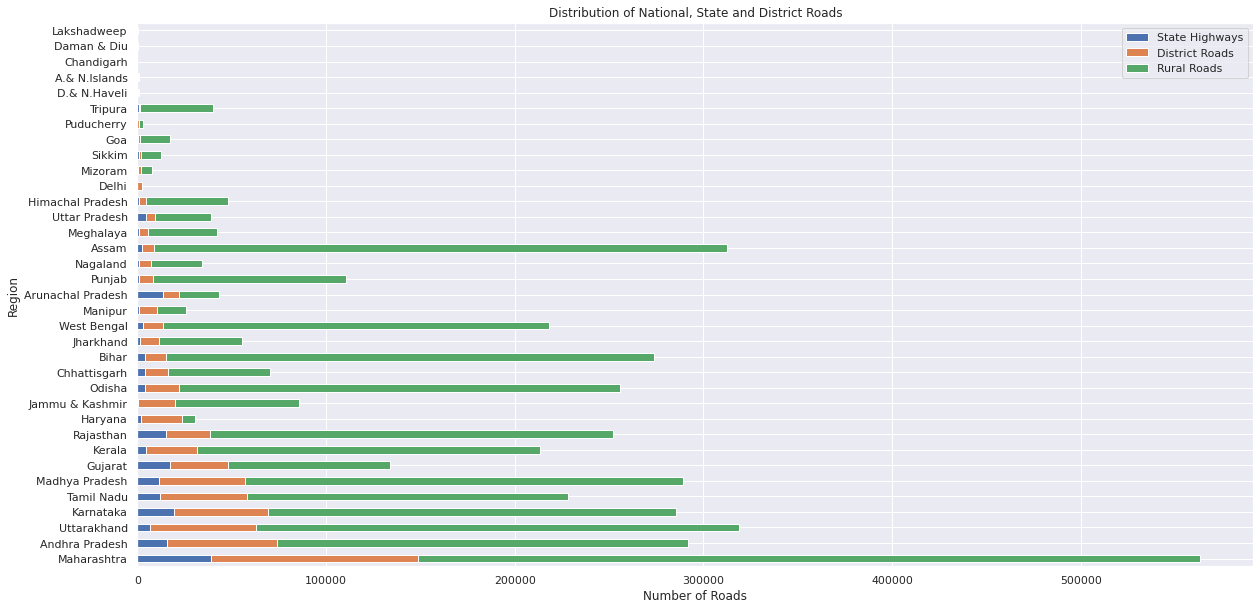

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df = df.sort_values('District Roads', ascending=False)
sns.set(rc={"figure.figsize":(20, 10)}) 

df.iloc[1:, 1:4].plot(kind='barh', stacked=True)
plt.ylabel("Region")
plt.xlabel("Number of Roads")
plt.title("Distribution of National, State and District Roads")

plt.legend(df.columns[1:4], loc='upper right')
plt.show()
# states = df['Name of the States'].unique()


In [ ]:
df3.columns

Index(['Name of the States', 'National Highways', 'State Highways',
       'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads',
       'Total road Length', 'Total Population', 'Road length per '000 pop',
       'Road length per '000  Population - National Highways',
       'Road length per '000  Population - State Highways',
       'Road length per '000  Population - District Roads',
       'Road length per '000  Population - Rural Roads',
       'Road length per '000  Population - Urban roads',
       'Road length per '000  Population - Project Roads'],
      dtype='object')

Screen Display, Presentation and Poster

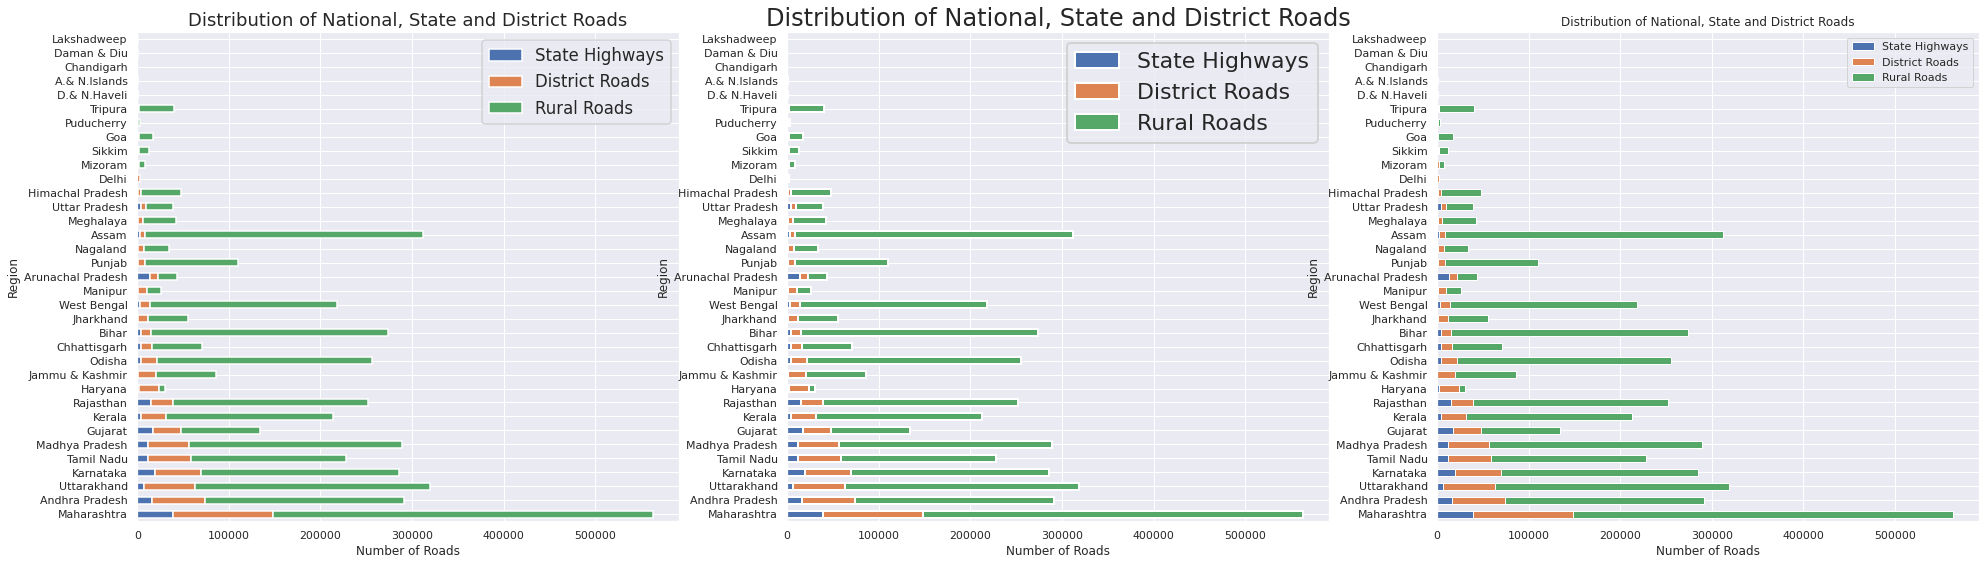

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(33,9))
# df = df.sort_values('District Roads', ascending=False)
# sns.set(rc={"figure.figsize":(20, 10)}) 
sns.set_context('talk')
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[0])
axes[0].set_ylabel("Region")
axes[0].set_xlabel("Number of Roads")
axes[0].set_title("Distribution of National, State and District Roads")

axes[0].legend(df.columns[1:4], loc='upper right')

sns.set_context('poster')
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[1])
axes[1].set_ylabel("Region")
axes[1].set_xlabel("Number of Roads")
axes[1].set_title("Distribution of National, State and District Roads")

axes[1].legend(df.columns[1:4], loc='upper right')

sns.set_context('notebook')
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[2])
axes[2].set_ylabel("Region")
axes[2].set_xlabel("Number of Roads")
axes[2].set_title("Distribution of National, State and District Roads")

axes[2].legend(df.columns[1:4], loc='upper right')
plt.show()
# states = df['Name of the States'].unique()


Visualizing using different color palettes

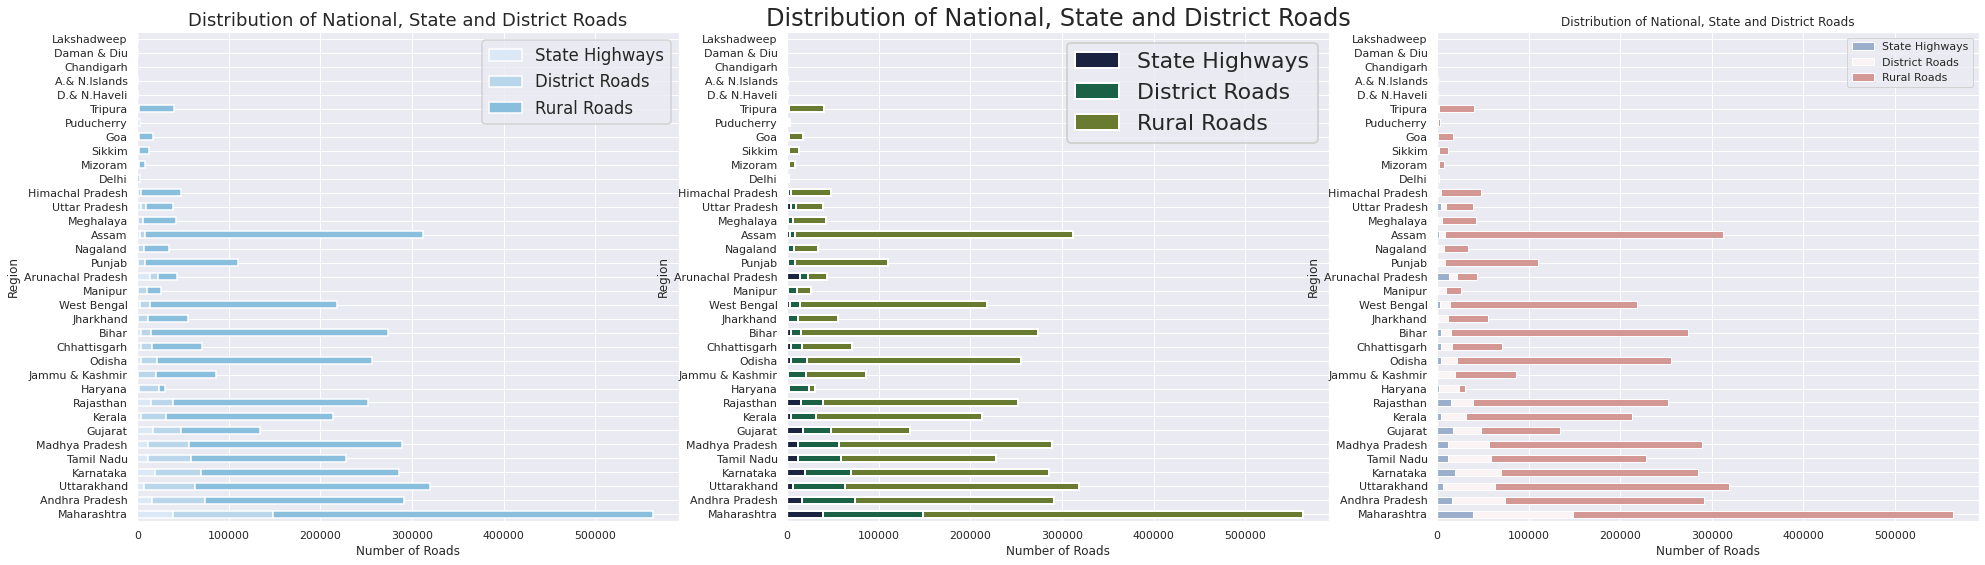

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(33,9))
# df = df.sort_values('District Roads', ascending=False)
# sns.set(rc={"figure.figsize":(20, 10)}) 
sns.set_context('talk')
sns.set_palette('Blues')
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[0])
axes[0].set_ylabel("Region")
axes[0].set_xlabel("Number of Roads")
axes[0].set_title("Distribution of National, State and District Roads")

axes[0].legend(df.columns[1:4], loc='upper right')

sns.set_context('poster')
sns.set_palette('cubehelix')
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[1])
axes[1].set_ylabel("Region")
axes[1].set_xlabel("Number of Roads")
axes[1].set_title("Distribution of National, State and District Roads")

axes[1].legend(df.columns[1:4], loc='upper right')

sns.set_context('notebook')
sns.set_palette('vlag',3)
df.iloc[1:, 1:4].plot(kind='barh', stacked=True,ax=axes[2])
axes[2].set_ylabel("Region")
axes[2].set_xlabel("Number of Roads")
axes[2].set_title("Distribution of National, State and District Roads")

axes[2].legend(df.columns[1:4], loc='upper right')
plt.show()
# states = df['Name of the States'].unique()
